
🔍 **Column Check Report** 🔍

✔️ Found Columns (11):
    - Clone
    - T
    - G
    - Gln
    - Xv
    - Xm
    - L
    - V
    - Mab
    - rP
    - rep

🎉 All expected columns are present!

Actual columns loaded in DataFrame: ['Clone', 'T', 'Xv', 'Xm', 'V', 'rep', 'Mab', 'rP', 'G', 'L', 'Gln', 'Glu']

**Cleaned Data Head:**
| Clone   |   Time (hours) |   Viable Cells (cells/mL) |   Dead Cells (cells/mL) |   Viability (%) |   Replicate |   Antibody Concentration (mg/mL) |   Recombinant Protein (mg/mL) |   Glucose (g/L) |   Lactate (g/L) |   Glutamine (mmol/L) |   Glutamate (mmol/L) |
|:--------|---------------:|--------------------------:|------------------------:|----------------:|------------:|---------------------------------:|------------------------------:|----------------:|----------------:|---------------------:|---------------------:|
| X-B7    |              0 |                    166000 |                       0 |             100 |           1 |                              

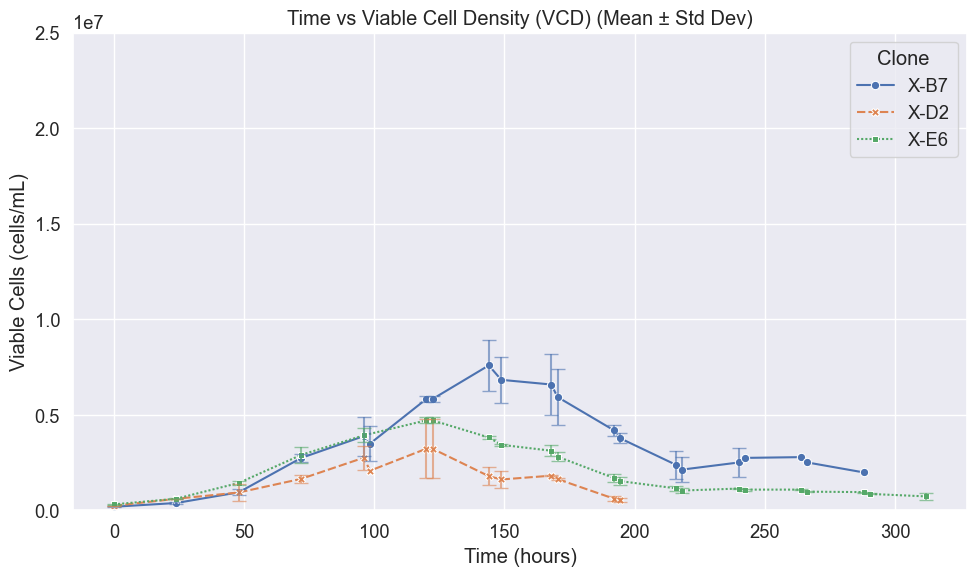

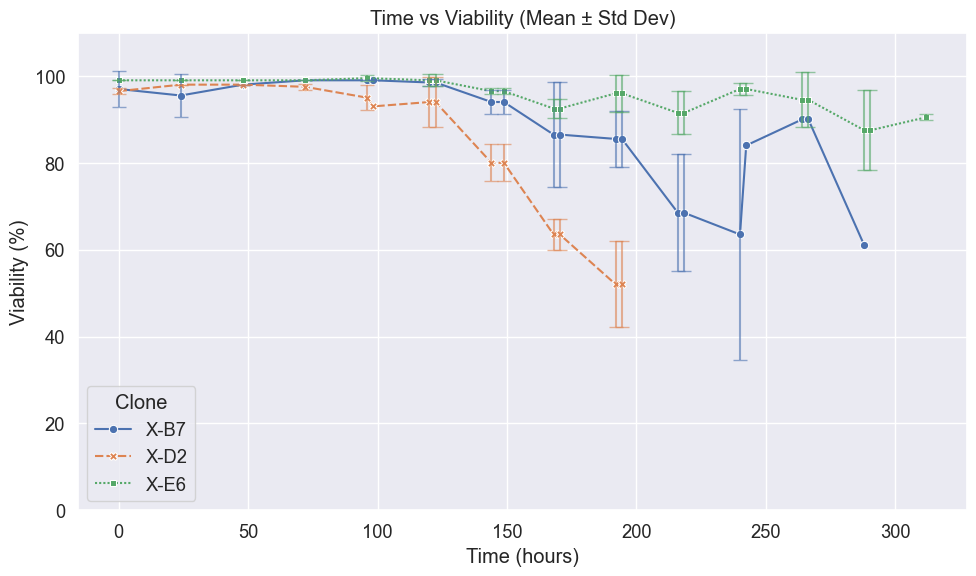

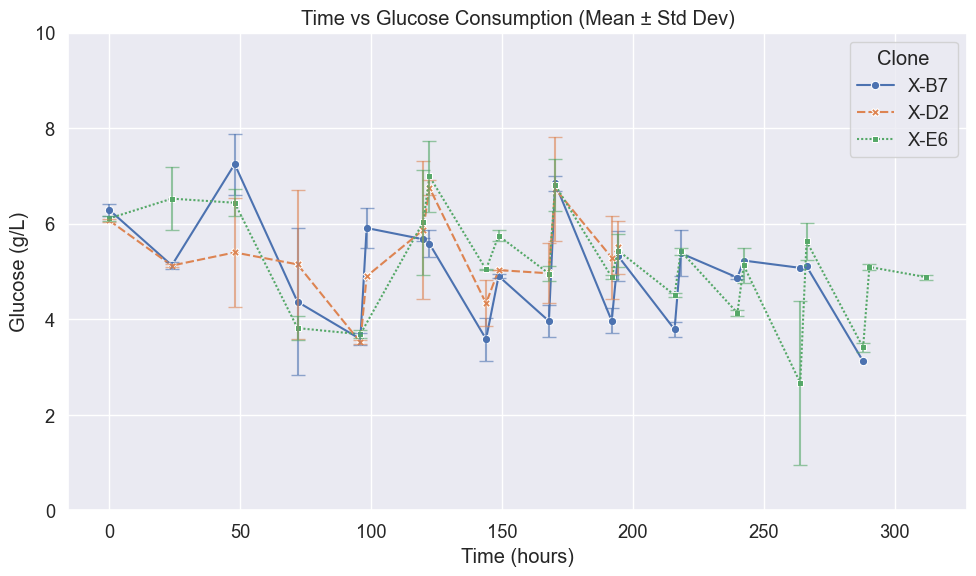

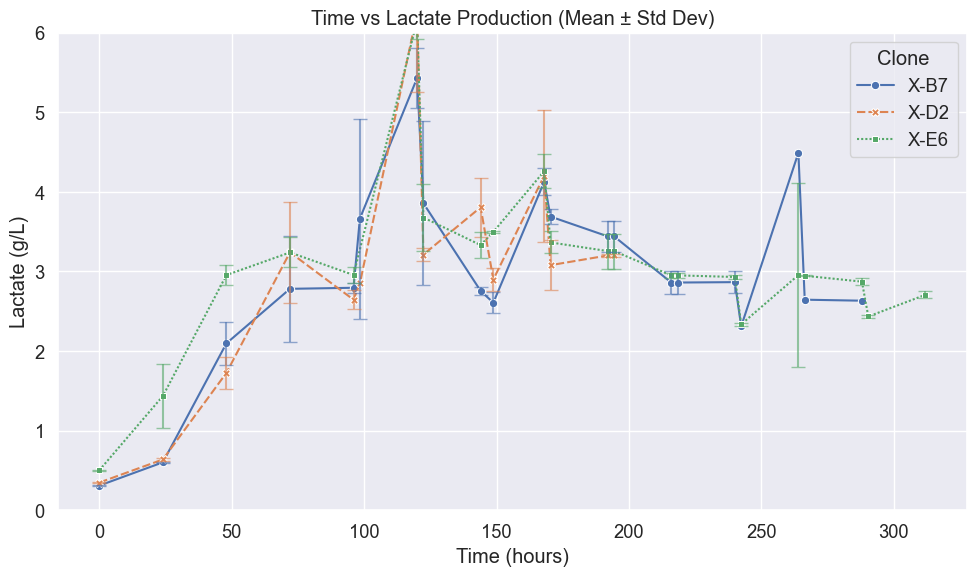

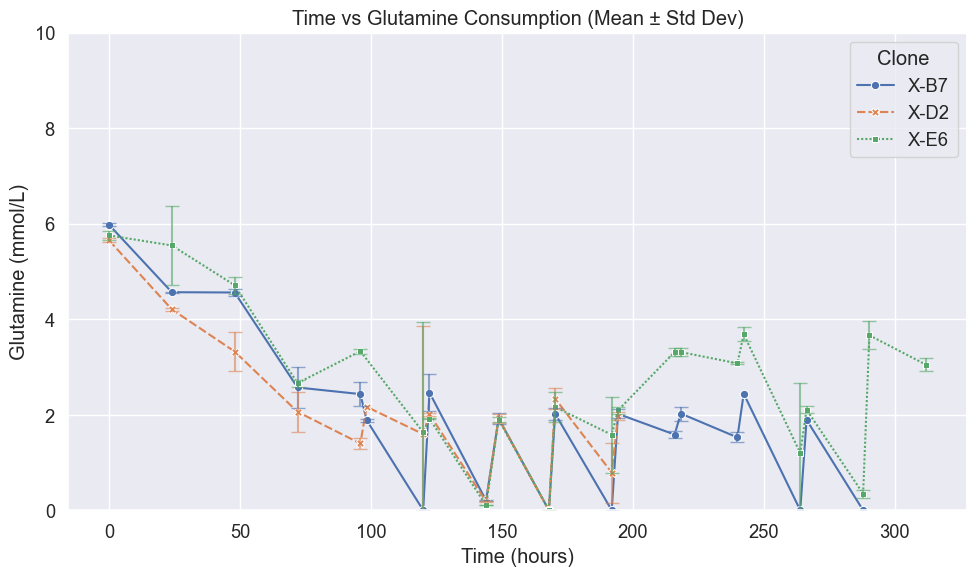

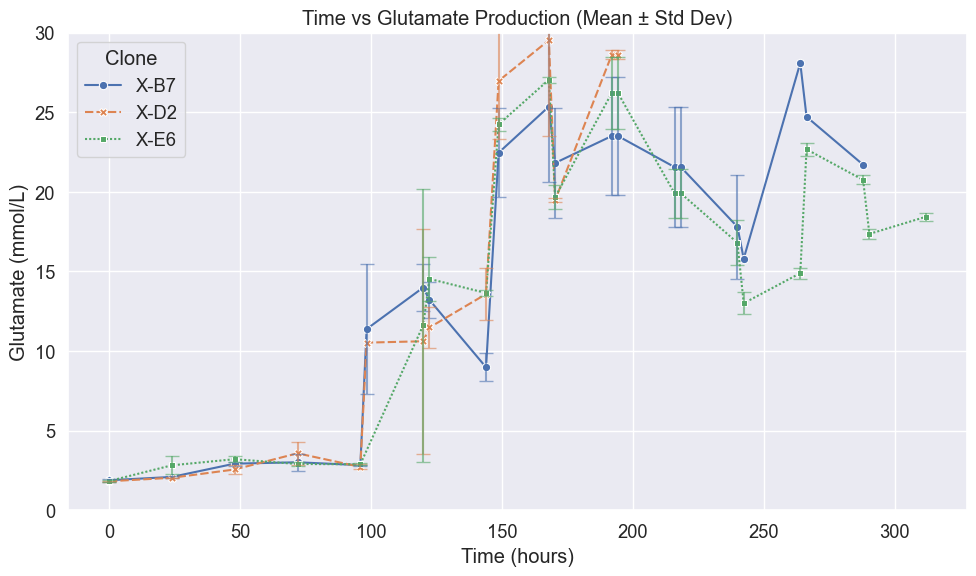

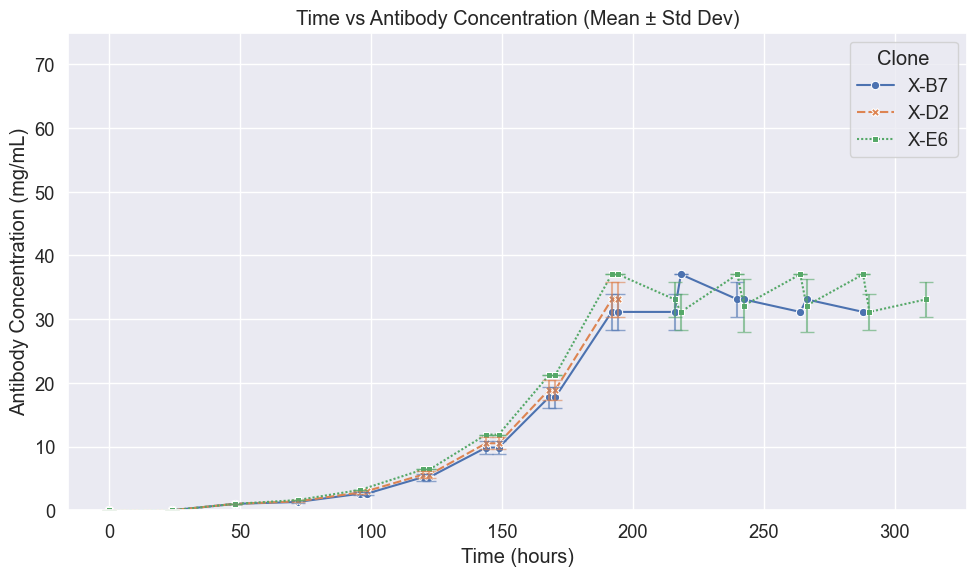

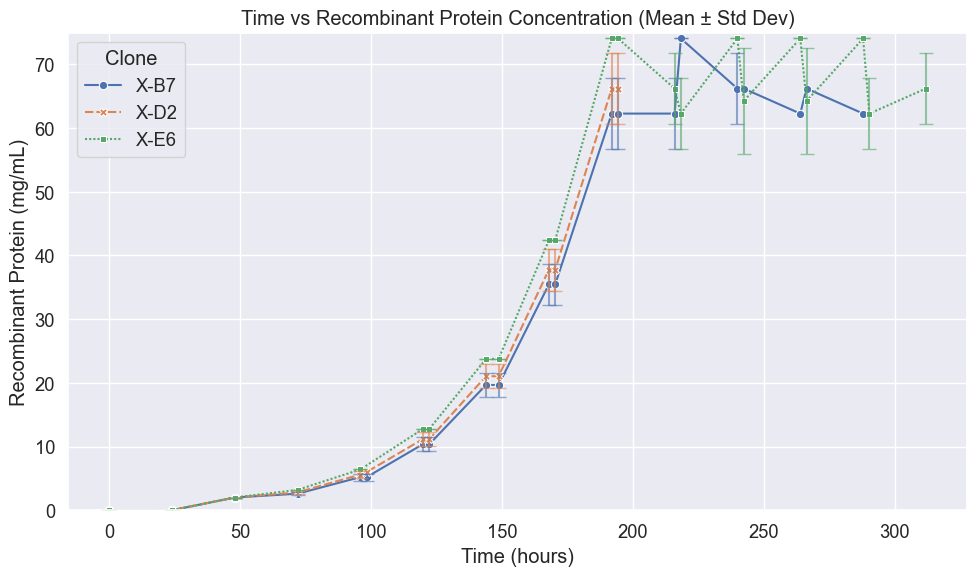

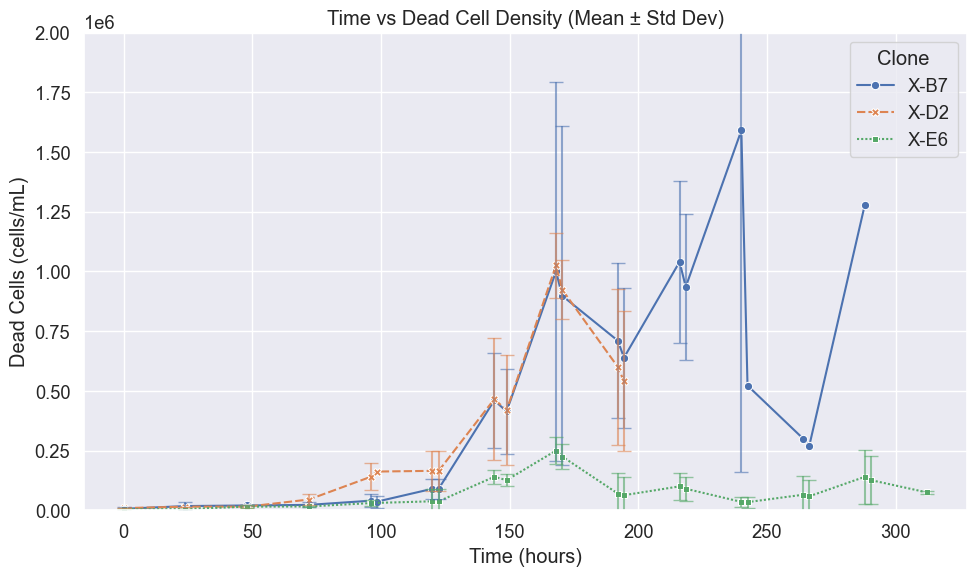


--- Generating Individual Plots (Normalized Data) ---


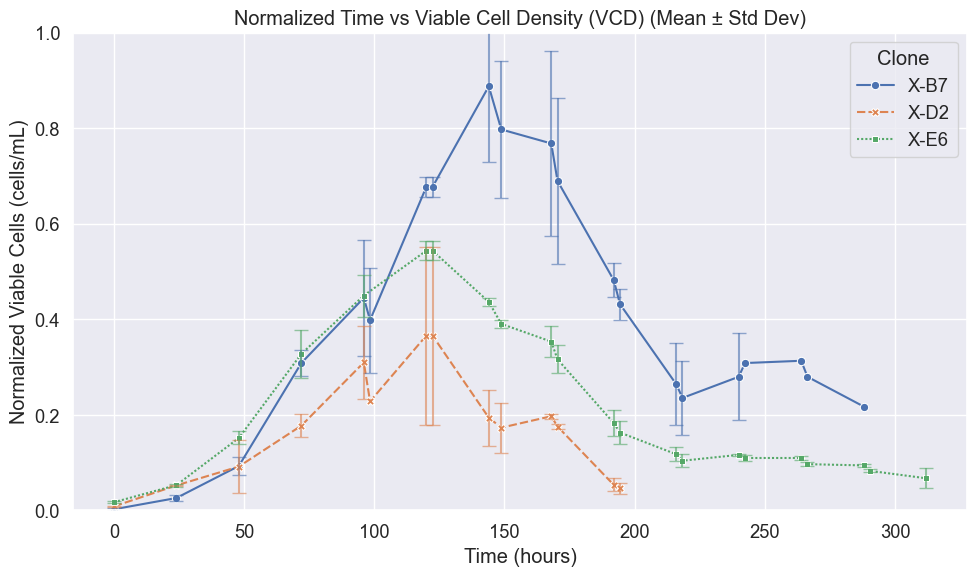

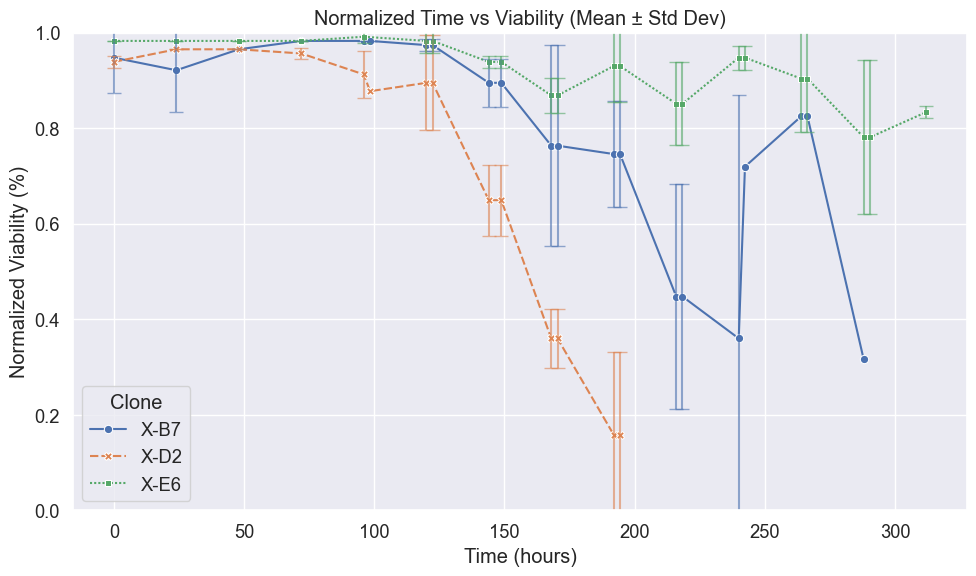

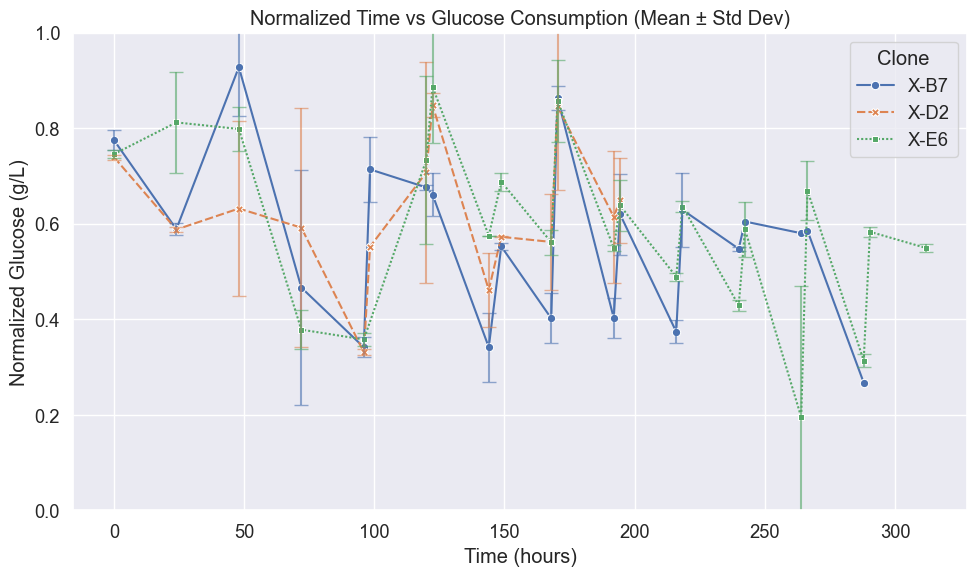

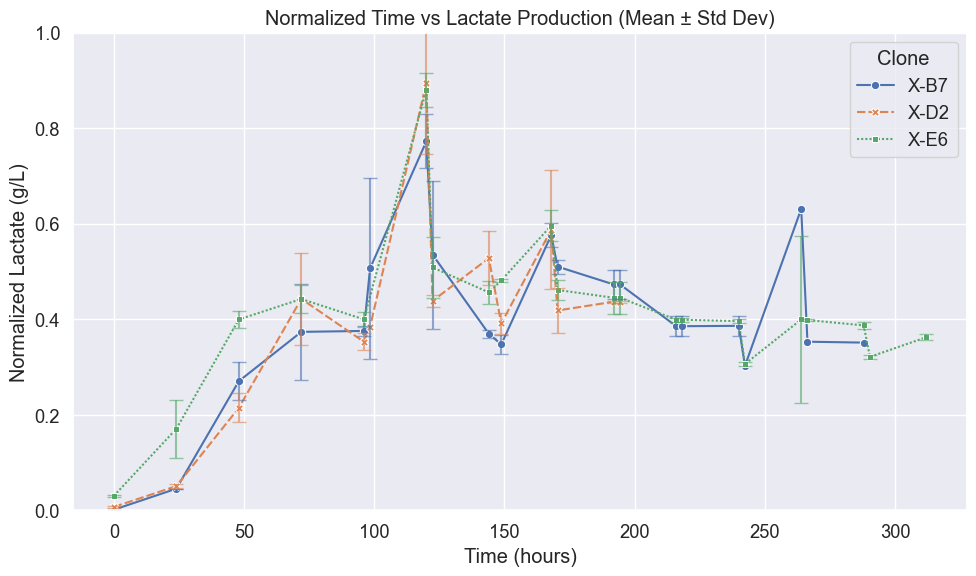

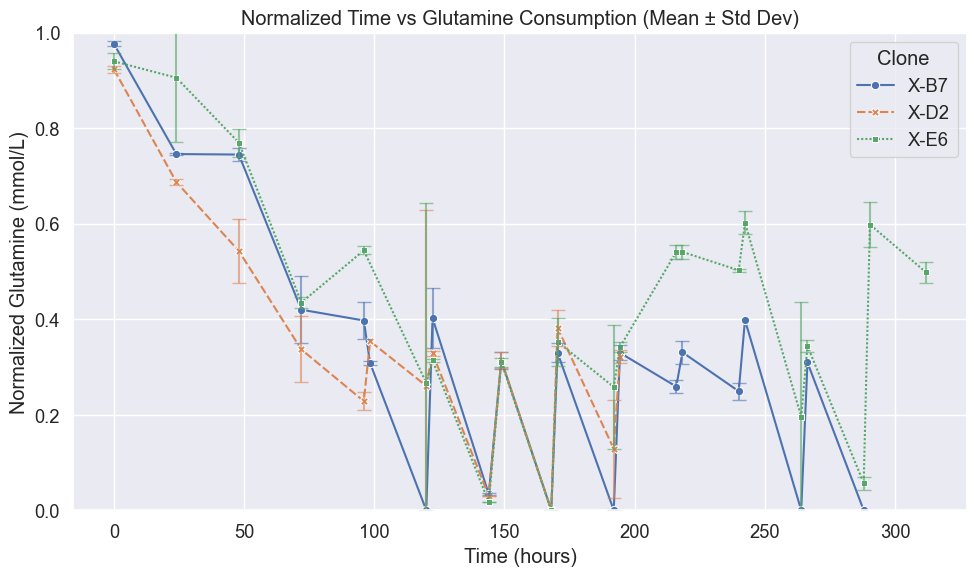

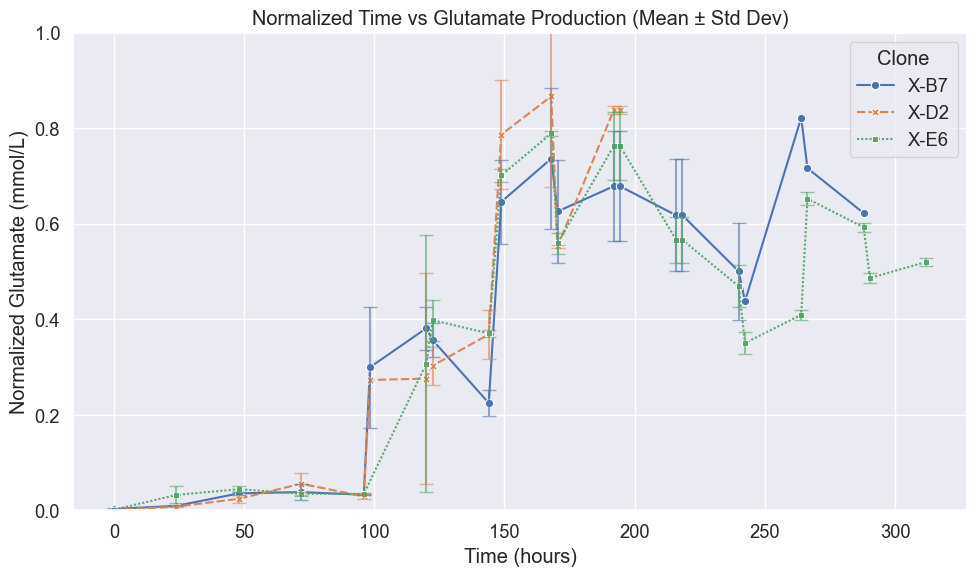

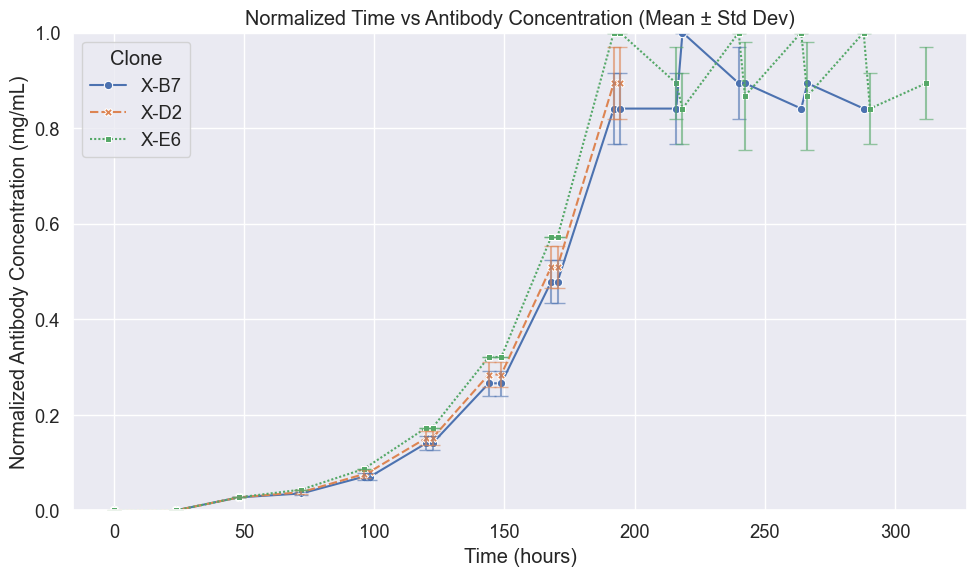

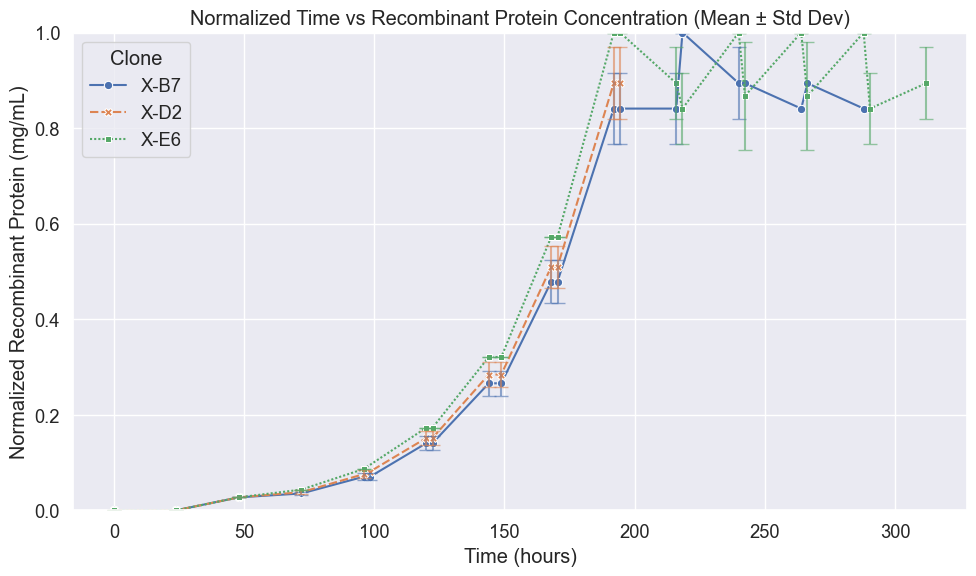

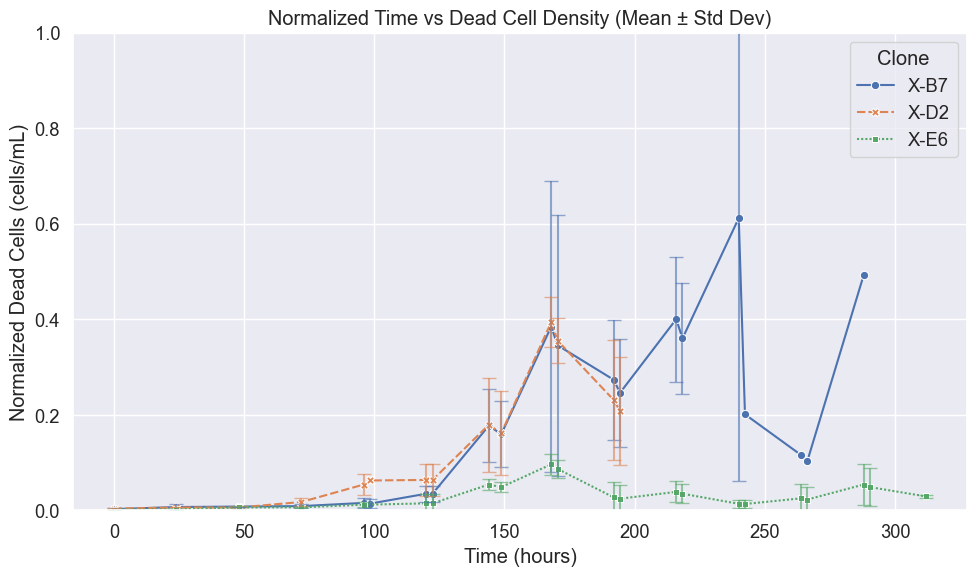


✅ All individual plots have been generated and saved to the 'figures' directory.

--- Generating Combined (Dual Y-Axis) Plots ---

--- Generating Combined Plots (Original Data) ---


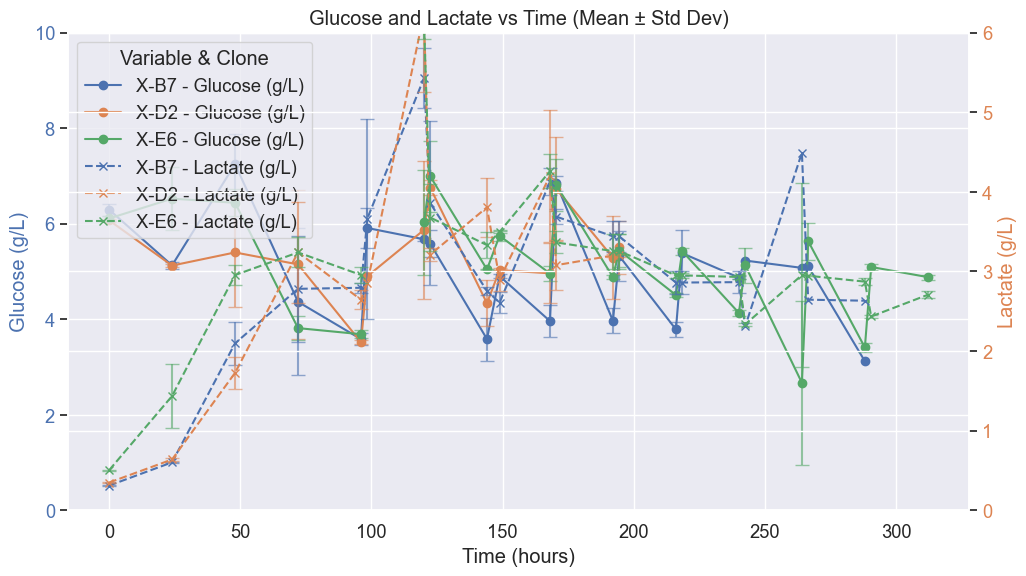

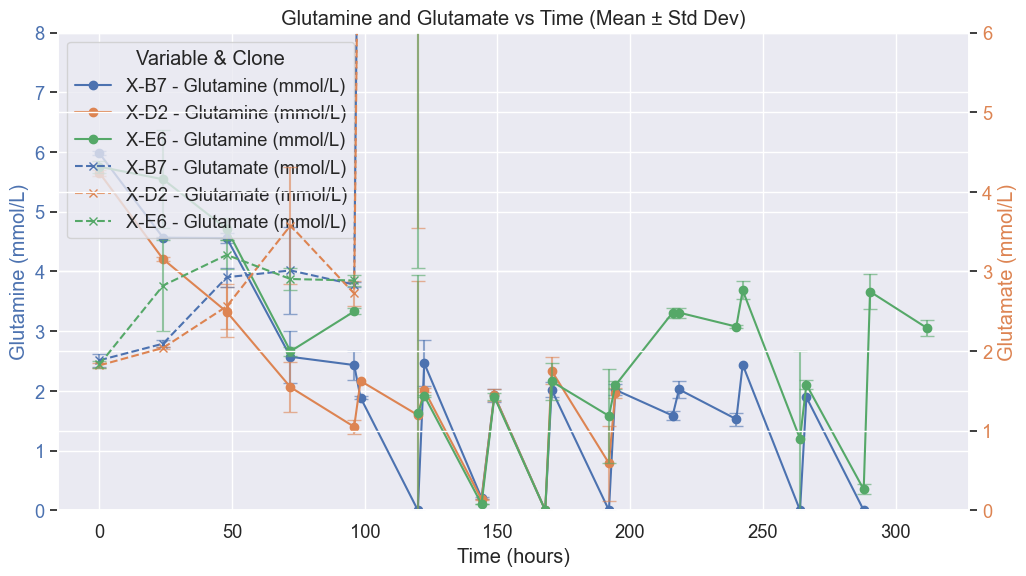

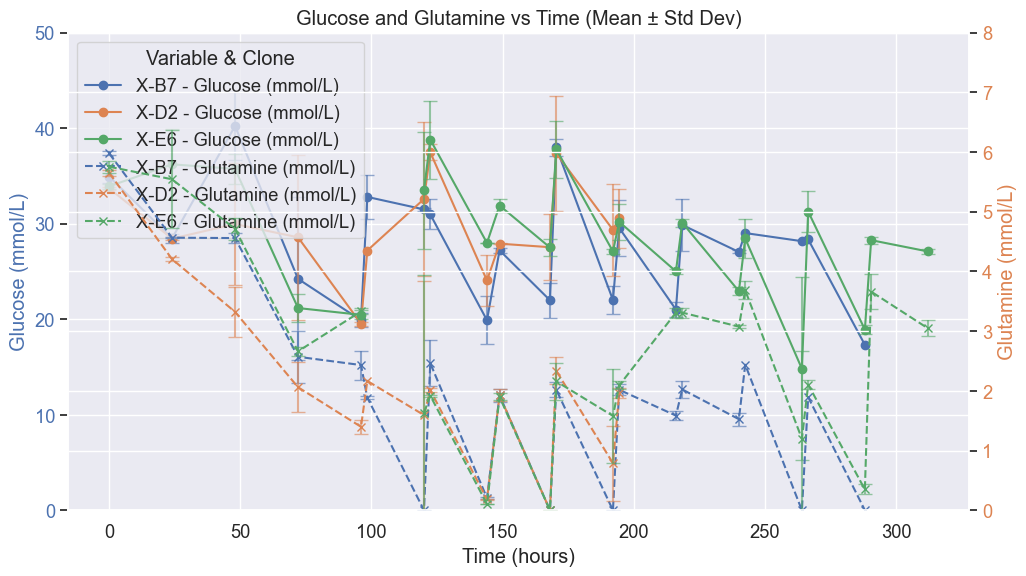

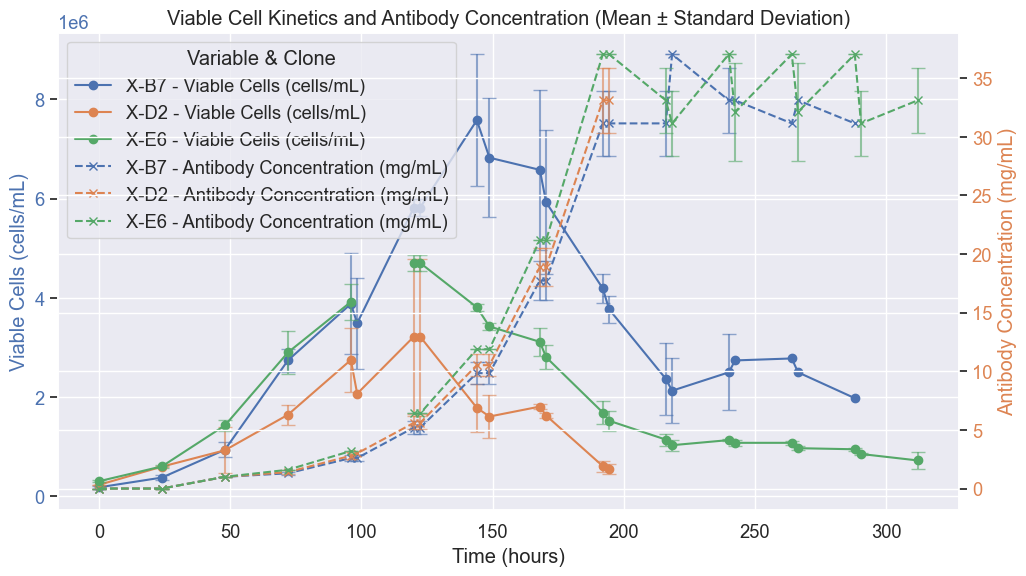

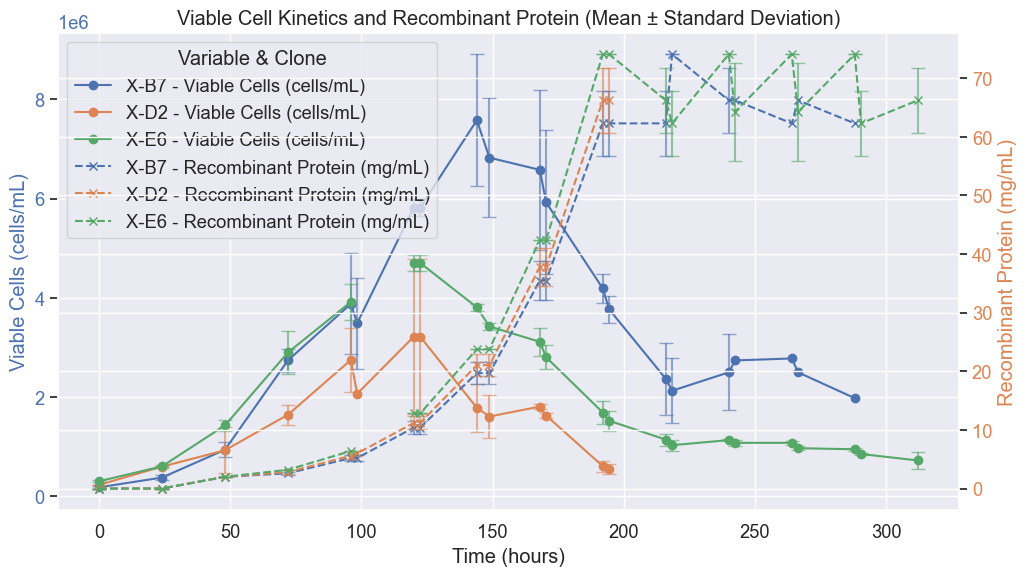


--- Generating Combined Plots (Normalized Data) ---


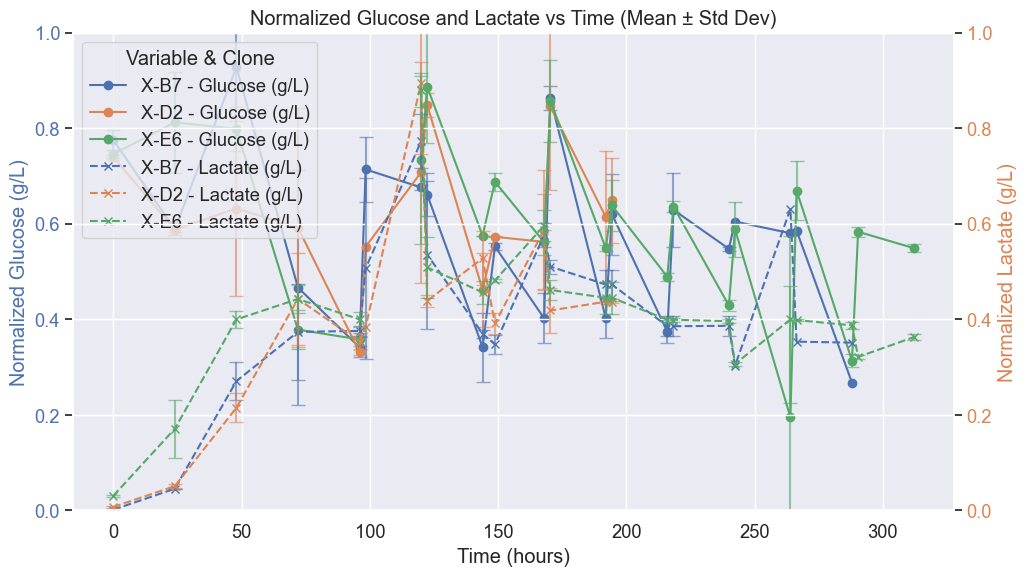

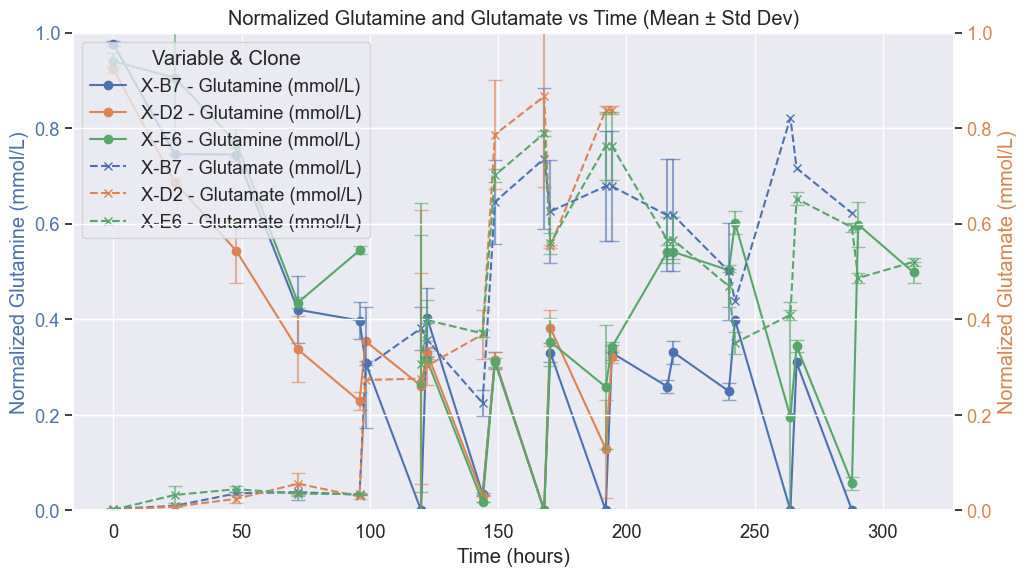

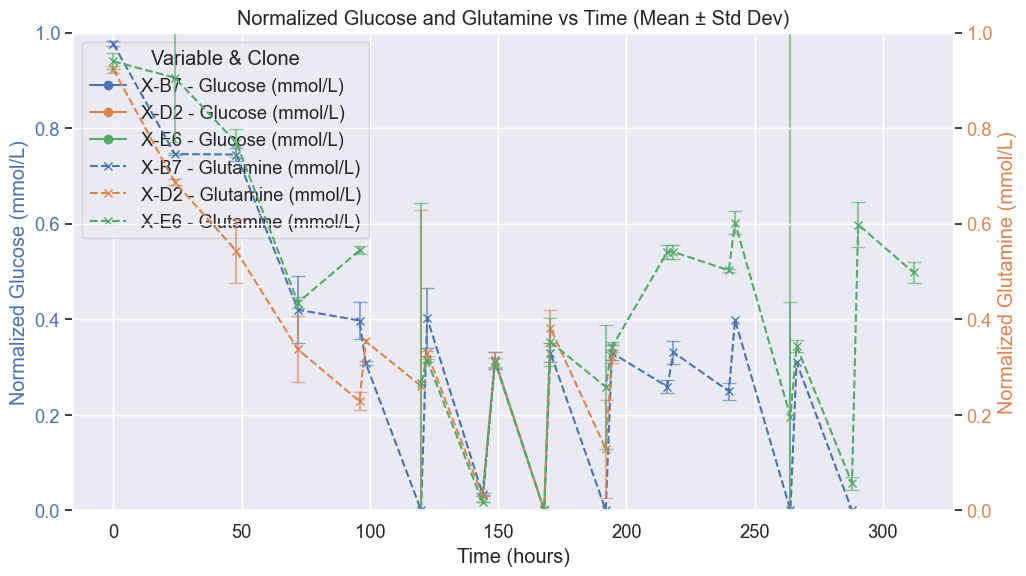

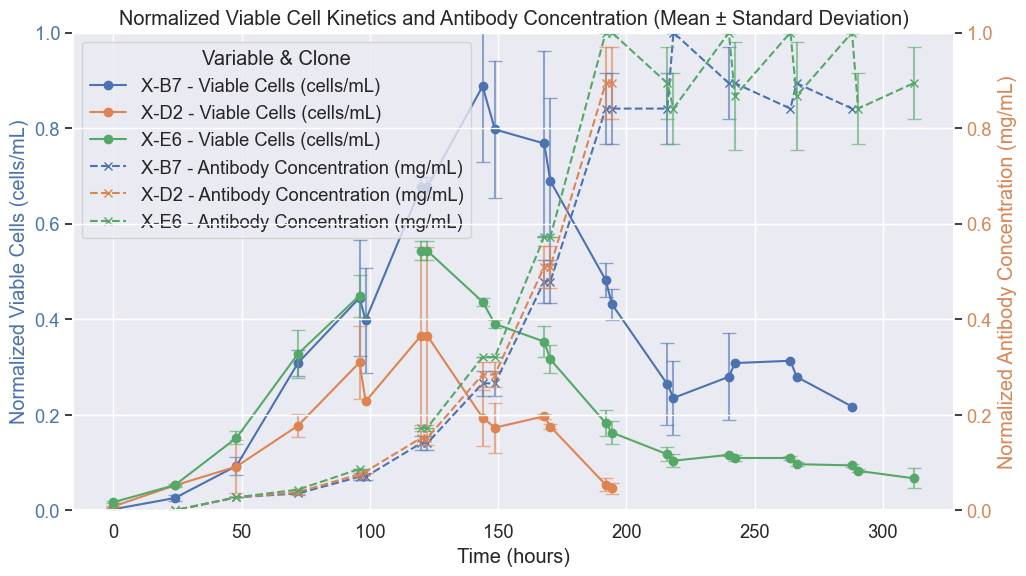

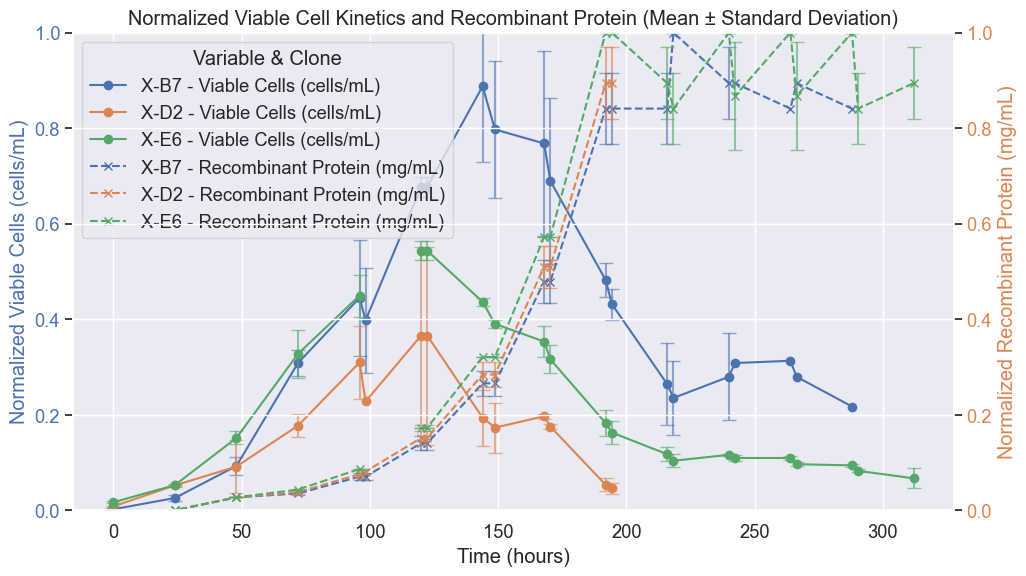


✅ All combined plots have been generated and saved to the 'figures' directory.

--- Exponential Phase Analysis: Using data from 0 to 72 hours ---

**Kinetic and Stoichiometric Parameters Calculated per Replicate:**
| Clone   |   Replicate |   Specific Growth Rate (mu, d^-1) |   Average Glucose Rate (dG/dt, mmol/L/day) |   Average Glutamine Rate (dGln/dt, mmol/L/day) |   Average Glutamate Rate (dGlu/dt, mmol/L/day) |   Average Lactate Rate (dL/dt, mmol/L/day) |   Average Antibody Rate (dMab/dt, mg/L/day) |   Average Recombinant Protein Rate (drP/dt, mg/L/day) |   Biomass Yield (Yx/G, cells/L/mmol) |   Biomass Yield (Yx/Gln, cells/L/mmol) |   Specific Glucose Consumption (qG, mmol/cell·day) |   Specific Glutamine Consumption (qGln, mmol/cell·day) |   Specific Glutamate Production (qGlu, mmol/cell·day) |   Specific Lactate Production (qL, mmol/cell·day) |   Specific Antibody Production (qMab, mg/cell·day) |   Specific Recombinant Protein Production (qrP, mg/cell·day) |
|:--------|-------

C:\Users\ebald\AppData\Local\Temp\ipykernel_10160\19122583.py:834: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


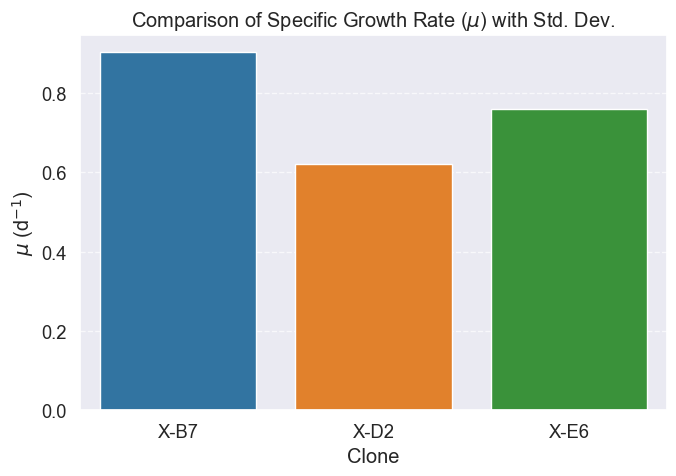

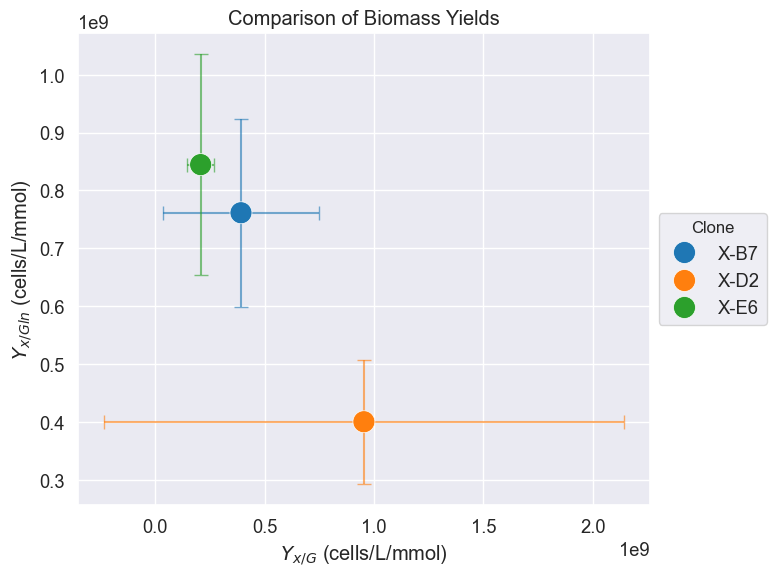

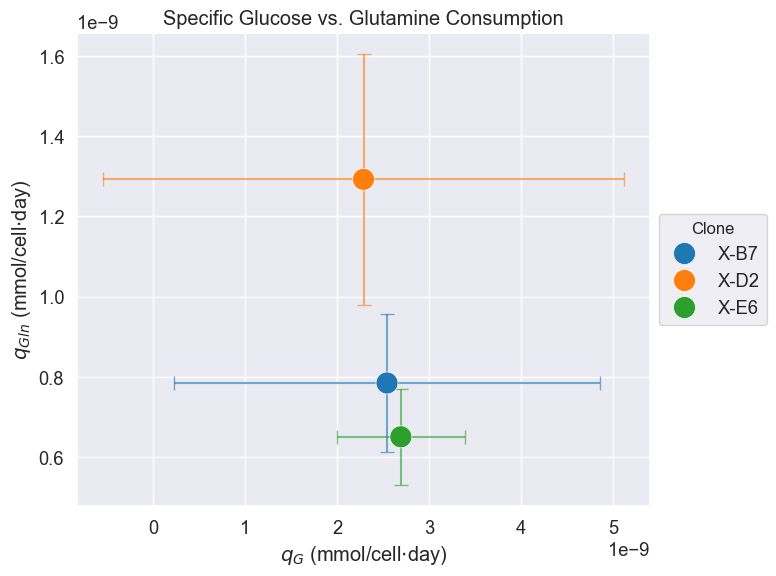

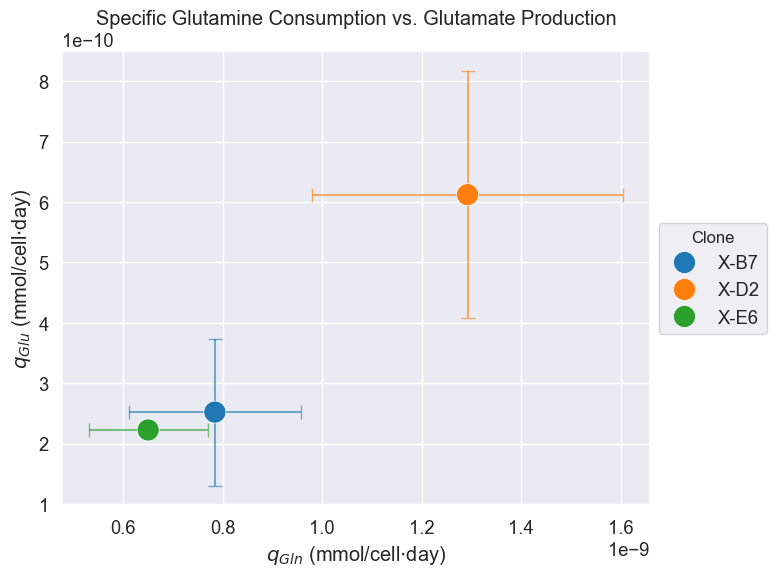

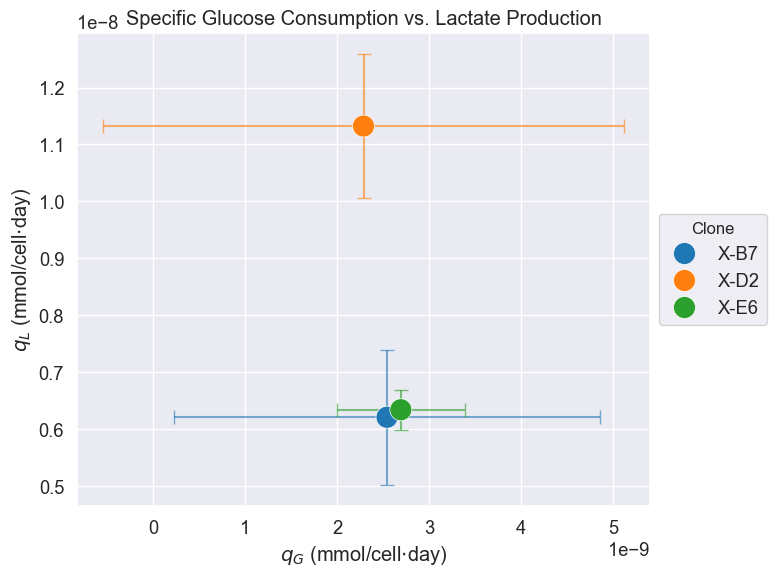

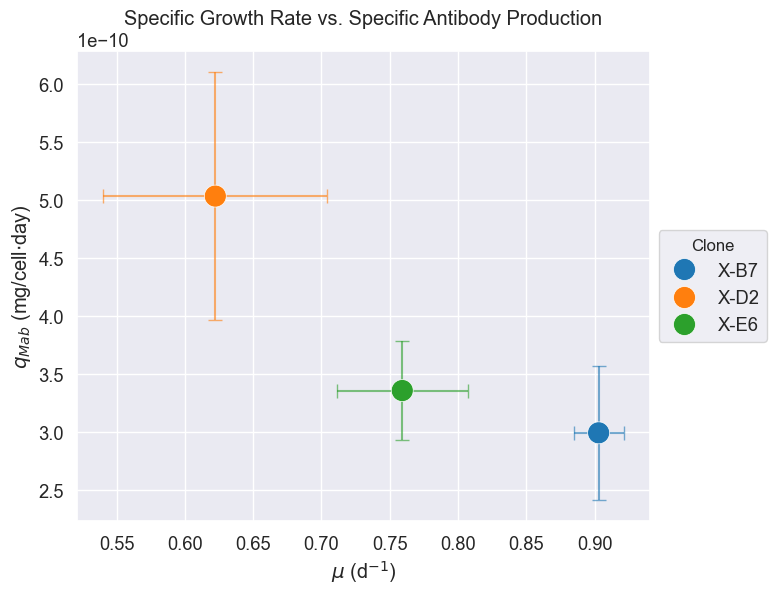

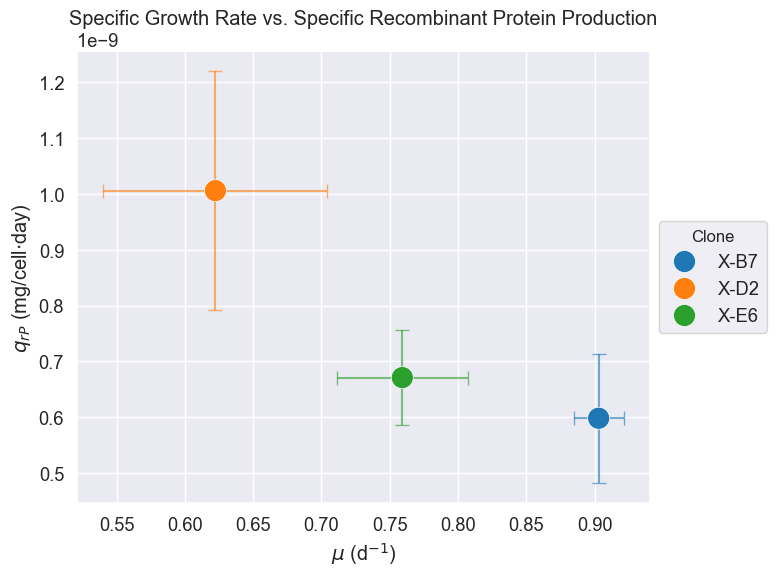


✅ All parameter comparison plots have been generated and saved to the 'figures' directory.


In [4]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from typing import Union, Tuple, List # Necessary for type hints

# ==============================================================================
# --- 0. Global Constants and User Configuration ---
# ==============================================================================

# IMPORTANT: Adjust these parameters to your specific data and analysis needs.

# 0.1 Data File Location: Define the path to your raw dataset.
#     Ensure your CSV file is located in a 'data/' directory relative to your script,
#     or provide the full path to your file.
DATASET_PATH = 'data/Example.csv'

# 0.2 Exponential Phase Time Range (for kinetic and stoichiometric calculations):
#     Define the start and end times (in hours) for the exponential growth phase.
#     This range is used to calculate parameters like specific growth rate.
#     *** IMPORTANT: Adjust TIME_END based on your actual data's time points. ***
#     *** To perform linear regression, at least 2 data points must fall within this range. ***
TIME_START = 0  # Start time in hours for exponential phase analysis
TIME_END = 72   # End time in hours for exponential phase analysis (Adjusted for your data points)

# 0.3 Output Directory for Figures:
#     Configure the directory where all generated plots will be saved.
#     The directory will be created automatically if it doesn't already exist.
OUTPUT_DIR = 'figures'

# 0.4 Normalized Plots Configuration:
#     Set to True to generate additional normalized plots (0-1 scale).
#     Set to False to skip generation of normalized plots.
GENERATE_NORMALIZED_PLOTS = True

# 0.5 Define standard molecular weights (MW) for relevant metabolites.
#     These are used for unit conversions (e.g., g/L to mmol/L).
MW_GLUCOSE = 180.16   # g/mol
MW_LACTATE = 90.08    # g/mol
MW_GLUTAMINE = 146.14 # g/mol
MW_GLUTAMATE = 147.13 # g/mol

# --- Initial Setup ---
# Ensure the output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Set a consistent aesthetic theme for all plots using Seaborn.
# 'darkgrid' provides a clean background, and 'font_scale' adjusts text size for readability.
sns.set_theme(style="darkgrid", font_scale=1.2)


# ==============================================================================
# --- 1. Helper Functions ---
#     This section defines reusable functions for data handling, plotting,
#     and file operations.
# ==============================================================================

def clean_filename(name: str) -> str:
    """
    Cleans a string to make it suitable for use as a filename.
    It replaces or removes characters that are typically invalid or problematic
    in file paths, ensuring cross-platform compatibility.

    Args:
        name (str): The original string to be cleaned.

    Returns:
        str: The cleaned string, safe to use as a filename.
    """
    cleaned = name.replace(' ', '_').replace('(', '').replace(')', '').replace('/', '_')
    cleaned = cleaned.replace('%', '').replace(':', '_').replace('.', '_')
    return cleaned

def confirm_columns(df: pd.DataFrame, expected_columns: List[str]) -> None:
    """
    Checks for the presence of a predefined list of expected columns within a DataFrame.
    It prints a clear report indicating which columns were found and which are missing,
    providing immediate feedback on data integrity.

    Args:
        df (pd.DataFrame): The DataFrame to inspect for column presence.
        expected_columns (List[str]): A list of column names that are anticipated in the DataFrame.
    """
    found_columns = [col for col in expected_columns if col in df.columns]
    missing_columns = [col for col in expected_columns if col not in df.columns]

    print("\n🔍 **Column Check Report** 🔍")
    print(f"\n✔️ Found Columns ({len(found_columns)}):")
    for col in found_columns:
        print(f"    - {col}")

    if missing_columns:
        print(f"\n❌ Missing Columns ({len(missing_columns)}):")
        for col in missing_columns:
            print(f"    - {col}")
        print("\n⚠️ WARNING: Some expected columns are missing. Analysis may be impacted.")
    else:
        print("\n🎉 All expected columns are present!")
    print(f"\nActual columns loaded in DataFrame: {df.columns.tolist()}") # Added for debugging

def calculate_kinetics_stats(df: pd.DataFrame, value_column: str) -> Union[pd.DataFrame, None]:
    """
    Calculates the mean and standard deviation for a specified value column,
    grouped by 'Time (hours)' and 'Clone'. This function is fundamental for
    generating time-series plots that include error bars representing data variability
    across experimental replicates.

    Args:
        df (pd.DataFrame): The input DataFrame containing raw kinetic data.
        value_column (str): The name of the column for which to compute mean and standard deviation.

    Returns:
        Union[pd.DataFrame, None]: A new DataFrame containing 'Time (hours)', 'Clone', 'mean',
                                   and 'std' columns for the specified `value_column`.
                                   Returns `None` if the `value_column` is not found in the input DataFrame.
    """
    if value_column not in df.columns:
        print(f"Warning: Column '{value_column}' not found in DataFrame. Skipping statistics calculation.")
        return None

    # Group by 'Time (hours)' and 'Clone' to calculate statistics for each unique condition.
    # `observed=False` is used to include all categories of 'Clone' even if they don't have
    # data in a specific group, suppressing a `FutureWarning` from pandas.
    kinetics_stats = df.groupby(['Time (hours)', 'Clone'], observed=False)[value_column].agg(
        mean='mean', # Calculate the mean of the value_column for each group
        std='std'    # Calculate the standard deviation of the value_column for each group
    ).reset_index() # Resetting the index turns the grouped columns back into regular columns

    return kinetics_stats

def normalize_column(df: pd.DataFrame, column_name: str) -> pd.Series:
    """
    Normalizes a numerical column to a 0-1 scale using the min-max normalization method:
    (value - min) / (max - min).
    If max and min are the same (i.e., column has constant values), returns zeros.

    Args:
        df (pd.DataFrame): The DataFrame containing the column to normalize.
        column_name (str): The name of the column to normalize.

    Returns:
        pd.Series: A new Series with the normalized values.
    """
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    if max_val == min_val:
        return pd.Series(0.0, index=df.index)
    return (df[column_name] - min_val) / (max_val - min_val)


# ==============================================================================
# --- 2. Data Loading and Initial Cleaning ---
#     This section handles reading the raw data, standardizing column names,
#     and converting data types to ensure numerical columns are correctly processed.
#     It also includes robust error handling for non-numeric entries.
# ==============================================================================

def load_and_clean_data(file_path: str, expected_columns: List[str]) -> pd.DataFrame:
    """
    Loads a CSV dataset, performs initial cleaning, standardizes column names,
    and converts data types to prepare the DataFrame for analysis.
    This function is designed to handle CHO cell culture kinetic data, ensuring
    numerical columns are properly formatted and 'Clone' is treated as a category.

    Args:
        file_path (str): The full path to the CSV file to be loaded.
        expected_columns (List[str]): A list of anticipated column names in the
                                     raw dataset. Used for initial validation.

    Returns:
        pd.DataFrame: A cleaned and prepared DataFrame, ready for further analysis.
                      The function will exit the script if the file is not found
                      or if other loading errors occur.
    """
    try:
        # Read the CSV file, skipping the first row if it's a header or metadata line.
        df = pd.read_csv(file_path, skiprows=1)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found. Please verify the path and file name.")
        exit() # Exit the script if the file isn't found
    except Exception as e:
        print(f"An error occurred while loading the file: {e}")
        exit() # Exit for other general loading errors

    # Strip any leading/trailing whitespace from column names to ensure consistency.
    df.columns = df.columns.str.strip()

    # Confirm that all expected columns are present after loading.
    confirm_columns(df, expected_columns)

    # Standardize column names for clarity and ease of access throughout the script.
    # This maps short, raw column names to more descriptive, readable ones.
    # Updated mapping to include 'Mab' and 'rP', and map 'Xm' to 'Dead Cells'
    df.rename(columns={
        "T": "Time (hours)",
        "G": "Glucose (g/L)",
        "Gln": "Glutamine (mmol/L)",
        "Xv": "Viable Cells (cells/mL)",
        "Xm": "Dead Cells (cells/mL)", # Corrected: Mapped Xm to Dead Cells
        "L": "Lactate (g/L)",
        "Glu": "Glutamate (mmol/L)",
        "V": "Viability (%)",
        "Mab": "Antibody Concentration (mg/mL)", # Included Mab as per user
        "rP": "Recombinant Protein (mg/mL)",    # Included rP as per user
        "rep": "Replicate"
    }, inplace=True)

    # Clean and convert numerical columns. This robust approach handles cases
    # where columns might contain non-numeric strings (e.g., symbols, commas).
    for column in df.columns:
        # Skip columns that are not expected to be numerical or are already processed.
        if column in ["Clone", "Time (hours)", "Replicate"]:
            continue

        # Attempt to convert to numeric, coercing errors to NaN.
        # This first converts to string to apply regex, then to numeric.
        df[column] = pd.to_numeric(
            df[column].astype(str).str.replace(r'[^\d.]', '', regex=True), # Remove non-digit/non-dot chars
            errors='coerce' # Convert parsing errors into NaN (Not a Number)
        )

    # Convert the 'Clone' column to a categorical type. This is efficient for grouping
    # and plotting, and it ensures consistent ordering and color mapping.
    if "Clone" in df.columns: # Check if 'Clone' column exists before converting
        df["Clone"] = df["Clone"].astype("category")

    # Optionally drop unused columns (like 'vivas', 'muertas' if Xm is used, 'C', 'dil')
    # Based on previous conversation, 'Xm' is used for dead cells, so 'muertas' can be dropped.
    columns_to_drop_after_mapping = ['vivas', 'muertas', 'C', 'dil']
    df.drop(columns=[col for col in columns_to_drop_after_mapping if col in df.columns], errors='ignore', inplace=True)

    return df

# Define the expected raw column names from your dataset for validation.
# Updated: Changed "Xd" to "Xm", and explicitly added "Mab" and "rP" as expected.
expected_raw_columns = [
    "Clone", "T", "G", "Gln", "Xv", "Xm", "L", "V", "Mab", "rP", "rep"
]

# Load and clean the dataset by calling the defined function.
kinetics_data = load_and_clean_data(DATASET_PATH, expected_raw_columns)

# Display a preview of the first few rows of the cleaned data.
print("\n**Cleaned Data Head:**")
print(kinetics_data.head().to_markdown(index=False))

# Display a statistical summary of the numerical columns in the cleaned DataFrame.
print("\n🔍 **DataFrame Overview** 🔍")
print(kinetics_data.describe().to_markdown(index=False))

# Print concise summary of the DataFrame including data types and non-null values.
print("\nDataFrame Info:")
kinetics_data.info()


# ==============================================================================
# --- 3. Data Normalization for Visualization ---
#     This section creates a new DataFrame with normalized data specifically
#     for plotting. The original 'kinetics_data' DataFrame is kept unchanged
#     for scientific calculations.
#     Normalization (Min-Max scaling): (value - min) / (max - min)
# ==============================================================================
kinetics_data_normalized = kinetics_data.copy()

if GENERATE_NORMALIZED_PLOTS:
    print("\n🔎 Creating a normalized copy of the DataFrame for visualization purposes...")

    # Identify the columns to normalize (all numeric columns except for identifiers).
    numerical_columns = kinetics_data_normalized.select_dtypes(include=np.number).columns.tolist()
    columns_to_exclude_from_normalization = ['Time (hours)', 'Replicate']
    columns_to_normalize = [col for col in numerical_columns if col not in columns_to_exclude_from_normalization]

    print("\nColumns to be normalized (scaled to a 0-1 range):")
    if columns_to_normalize:
        for col in columns_to_normalize:
            print(f"    - {col}")
            # Apply Min-Max scaling to each column in the new DataFrame.
            # The normalized column will overwrite the original for visualization purposes in this specific dataframe.
            kinetics_data_normalized[col] = normalize_column(kinetics_data_normalized, col)
    else:
        print("    No suitable numeric columns found for normalization.")

    print("\n✅ Successfully created 'kinetics_data_normalized' DataFrame.")
    print("    Note: Columns with constant values will be normalized to 0.0.")

    # Display a summary of the NEW normalized DataFrame to confirm the result.
    # All scaled columns should now have a min of 0.0 and a max of 1.0 (unless constant).
    print("\nStatistical summary of the NEW normalized DataFrame:")
    print(kinetics_data_normalized.describe().to_markdown(index=False))
else:
    print("\n--- Skipping Data Normalization (GENERATE_NORMALIZED_PLOTS is set to False) ---")


# ==============================================================================
# --- 4. Plotting Functions (Definitions) ---
#     This section defines reusable functions for generating individual and
#     combined kinetic plots.
# ==============================================================================

def save_plot_with_stats(df: pd.DataFrame, x_col: str, y_original_col_name: str,
                         output_dir: str, normalized: bool = False, **kwargs) -> None:
    """
    Generates and saves a time-series plot for a given 'y' variable, displaying its
    mean and standard deviation across different clones. The input DataFrame `df_stats`
    is expected to contain the original data from which means and std devs are calculated.

    Args:
        df (pd.DataFrame): The input DataFrame containing kinetic data (original or normalized).
        x_col (str): The name of the column to be used for the x-axis (e.g., 'Time (hours)').
        y_original_col_name (str): The original name of the column for which statistics
                                   were calculated (used for labels and titles).
        output_dir (str): The directory path where the generated plot image will be saved.
        normalized (bool): If True, indicates the data is normalized, affecting title and filename.
        **kwargs: Arbitrary keyword arguments to customize the plot, including:
            - figsize (tuple): Dimensions of the figure (width, height) in inches. Defaults to (10, 6).
            - xlabel (str): Custom label for the x-axis. Defaults to `x_col`.
            - ylabel (str): Custom label for the y-axis. Defaults to `y_original_col_name`.
            - title (str): Custom title for the plot. Defaults to a descriptive title.
            - ylim (tuple): A tuple (min, max) to set the y-axis limits. Defaults to None.
    """
    stats_df = calculate_kinetics_stats(df, y_original_col_name)

    if stats_df is None or stats_df.empty:
        print(f"No data to plot for '{y_original_col_name}'. Skipping plot generation.")
        return
    # Added robustness: Check if 'mean' column exists and is not all NaNs
    if 'mean' not in stats_df.columns or stats_df['mean'].isnull().all():
        print(f"Warning: 'mean' column is missing or all NaN for '{y_original_col_name}'. Skipping plot generation.")
        return

    fig_size = kwargs.get('figsize', (10, 6))
    plt.figure(figsize=fig_size)

    sns.lineplot(x=x_col, y='mean', hue="Clone", style="Clone", markers=True,
                 data=stats_df, errorbar=None, ax=plt.gca())

    color_palette = sns.color_palette()
    clone_categories = stats_df['Clone'].cat.categories

    for i, clone_name in enumerate(clone_categories):
        clone_data = stats_df[stats_df['Clone'] == clone_name]
        # Only plot error bars if 'std' column exists and contains non-NaN values
        if 'std' in clone_data.columns and not clone_data['std'].isnull().all():
            plt.errorbar(
                clone_data[x_col],
                clone_data['mean'],
                yerr=clone_data['std'],
                fmt='none',     # No line connecting error points
                capsize=5,      # Size of the error bar caps
                color=color_palette[i % len(color_palette)], # Assign a unique color per clone
                alpha=0.6        # Transparency for error bars
            )

    plt.xlabel(kwargs.get('xlabel', x_col))
    y_label_text = kwargs.get('ylabel', y_original_col_name)
    if normalized:
        y_label_text = f"Normalized {y_label_text}"
    plt.ylabel(y_label_text)

    title_text = kwargs.get('title', f"{y_original_col_name} vs {x_col}")
    if normalized:
        title_text = f"Normalized {title_text}"
    title_text += " (Mean ± Std Dev)"
    plt.title(title_text)

    plt.ylim(kwargs.get('ylim', None))
    plt.grid(True)

    plt.legend(title="Clone")
    plt.tight_layout()

    base_filename = f"{y_original_col_name}_vs_{x_col}"
    if normalized:
        base_filename += "_Normalized"
    base_filename += "_Mean_StdDev"

    cleaned_base = clean_filename(base_filename)
    final_filename_with_ext = f"{cleaned_base}.png"
    output_path = os.path.join(output_dir, final_filename_with_ext)
    plt.savefig(output_path, format="png", dpi=300, bbox_inches='tight')
    plt.show()

def save_combined_plot_with_stats(df: pd.DataFrame, x_col: str, y1_col: str, y2_col: str,
                                   output_dir: str, y1_label: str, y2_label: str, title: str,
                                   y1_ylim: Union[Tuple[float, float], None] = None,
                                   y2_ylim: Union[Tuple[float, float], None] = None,
                                   figsize: Tuple[float, float] = (10.5, 6),
                                   normalized: bool = False) -> None:
    """
    Generates and saves a combined plot with two Y-axes, allowing comparison of two
    different kinetic variables against a common X-axis (Time). The plot displays
    the mean and standard deviation for both variables.

    Args:
        df (pd.DataFrame): The input DataFrame containing the raw kinetic data.
        x_col (str): The name of the column for the x-axis (e.g., 'Time (hours)').
        y1_col (str): The name of the column for the primary y-axis (left).
        y2_col (str): The name of the column for the secondary y-axis (right).
        output_dir (str): The directory path where the generated plot image will be saved.
        y1_label (str): The label for the primary y-axis.
        y2_label (str): The label for the secondary y-axis.
        title (str): The main title for the plot.
        y1_ylim (tuple | None): A tuple (min, max) to set the primary y-axis limits. Defaults to None.
        y2_ylim (tuple | None): A tuple (min, max) to set the secondary y-axis limits. Defaults to None.
        figsize (tuple): Dimensions of the figure (width, height) in inches. Defaults to (10.5, 6).
        normalized (bool): If True, indicates the data is normalized, affecting title and filename.
    """
    stats_y1 = calculate_kinetics_stats(df, y1_col)
    stats_y2 = calculate_kinetics_stats(df, y2_col)

    if stats_y1 is None or stats_y1.empty or \
       'mean' not in stats_y1.columns or stats_y1['mean'].isnull().all():
        print(f"Skipping combined plot for {y1_col} due to missing or all NaN data.")
        return
    if stats_y2 is None or stats_y2.empty or \
       'mean' not in stats_y2.columns or stats_y2['mean'].isnull().all():
        print(f"Skipping combined plot for {y2_col} due to missing or all NaN data.")
        return

    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    color_palette = sns.color_palette()
    clone_categories = df['Clone'].cat.categories
    clone_colors = {clone: color_palette[i % len(color_palette)] for i, clone in enumerate(clone_categories)}

    lines = []

    for i, clone_name in enumerate(clone_categories):
        clone_data_y1 = stats_y1[stats_y1['Clone'] == clone_name]
        line, = ax1.plot(clone_data_y1[x_col], clone_data_y1['mean'],
                         label=f'{clone_name} - {y1_label}',
                         color=clone_colors[clone_name],
                         linestyle='-', marker='o')
        lines.append(line)
        if 'std' in clone_data_y1.columns and not clone_data_y1['std'].isnull().all():
            ax1.errorbar(clone_data_y1[x_col], clone_data_y1['mean'],
                         yerr=clone_data_y1['std'], fmt='none', capsize=5,
                         color=clone_colors[clone_name], alpha=0.6)

    for i, clone_name in enumerate(clone_categories):
        clone_data_y2 = stats_y2[stats_y2['Clone'] == clone_name]
        line, = ax2.plot(clone_data_y2[x_col], clone_data_y2['mean'],
                         label=f'{clone_name} - {y2_label}',
                         color=clone_colors[clone_name],
                         linestyle='--', marker='x')
        lines.append(line)
        if 'std' in clone_data_y2.columns and not clone_data_y2['std'].isnull().all():
            ax2.errorbar(clone_data_y2[x_col], clone_data_y2['mean'],
                         yerr=clone_data_y2['std'], fmt='none', capsize=5,
                         color=clone_colors[clone_name], alpha=0.6)

    ax1.set_xlabel(x_col)
    y1_label_text = y1_label
    y2_label_text = y2_label
    if normalized:
        y1_label_text = f"Normalized {y1_label}"
        y2_label_text = f"Normalized {y2_label}"

    ax1.set_ylabel(y1_label_text, color=color_palette[0])
    ax2.set_ylabel(y2_label_text, color=color_palette[1])

    ax1.tick_params(axis='y', labelcolor=color_palette[0])
    ax2.tick_params(axis='y', labelcolor=color_palette[1])

    if y1_ylim:
        ax1.set_ylim(y1_ylim)
    if y2_ylim:
        ax2.set_ylim(y2_ylim)

    title_text = title
    if normalized:
        title_text = f"Normalized {title}"
    plt.title(title_text)
    ax1.grid(True)

    labs = [l.get_label() for l in lines]
    ax1.legend(lines, labs, loc='upper left', title="Variable & Clone")

    plt.tight_layout()

    base_filename = title.replace(" vs ", "_vs_").replace(" (Mean ± Std Dev)", "")
    if normalized:
        base_filename += "_Normalized"
    cleaned_base_filename = clean_filename(base_filename)
    final_filename_with_extension = cleaned_base_filename + ".png"
    output_path = os.path.join(output_dir, final_filename_with_extension)

    plt.savefig(output_path, format="png", dpi=300, bbox_inches='tight')
    plt.show()


# ==============================================================================
# --- 5. Generate Individual Kinetic Plots ---
#     This section generates time-series plots for individual kinetic parameters,
#     showing the mean and standard deviation across replicates for each clone.
# ==============================================================================
print("\n--- Generating Individual Kinetic Plots ---")

# Define configurations for each individual plot.
# Added 'Recombinant Protein (mg/mL)' to individual plots
plot_configs_individual = [
    {"col": "Viable Cells (cells/mL)", "title": "Time vs Viable Cell Density (VCD)", "ylabel": "Viable Cells (cells/mL)", "ylim": (0, 25e6)},
    {"col": "Viability (%)", "title": "Time vs Viability", "ylabel": "Viability (%)", "ylim": (0, 110)},
    {"col": "Glucose (g/L)", "title": "Time vs Glucose Consumption", "ylabel": "Glucose (g/L)", "ylim": (0, 10)},
    {"col": "Lactate (g/L)", "title": "Time vs Lactate Production", "ylabel": "Lactate (g/L)", "ylim": (0, 6)},
    {"col": "Glutamine (mmol/L)", "title": "Time vs Glutamine Consumption", "ylabel": "Glutamine (mmol/L)", "ylim": (0, 10)},
    {"col": "Glutamate (mmol/L)", "title": "Time vs Glutamate Production", "ylabel": "Glutamate (mmol/L)", "ylim": (0,30)},
    {"col": "Antibody Concentration (mg/mL)", "title": "Time vs Antibody Concentration", "ylabel": "Antibody Concentration (mg/mL)", "ylim": (0, 75)},
    {"col": "Recombinant Protein (mg/mL)", "title": "Time vs Recombinant Protein Concentration", "ylabel": "Recombinant Protein (mg/mL)", "ylim": (0, 75)}, # Added rP plot
    {"col": "Dead Cells (cells/mL)", "title": "Time vs Dead Cell Density", "ylabel": "Dead Cells (cells/mL)", "ylim": (0, 2e6)},
]

# Loop through each plot configuration to generate and save individual plots (Original Data).
print("\n--- Generating Individual Plots (Original Data) ---")
for config in plot_configs_individual:
    column_name = config["col"]
    save_plot_with_stats(kinetics_data, "Time (hours)", column_name, OUTPUT_DIR,
                         ylabel=config["ylabel"], title=config["title"], ylim=config["ylim"], normalized=False)

if GENERATE_NORMALIZED_PLOTS:
    print("\n--- Generating Individual Plots (Normalized Data) ---")
    for config in plot_configs_individual:
        column_name = config["col"]
        # For normalized plots, set ylim to (0,1) and pass normalized=True
        # Check if the column was actually normalized (it might be skipped if all values are constant)
        if column_name in kinetics_data_normalized.columns: # Check if the normalized column exists
            save_plot_with_stats(kinetics_data_normalized, "Time (hours)", column_name, OUTPUT_DIR,
                                 ylabel=config["ylabel"], title=config["title"], ylim=(0,1), normalized=True)
        else:
            print(f"Skipping normalized plot for '{column_name}' as it was not normalized (likely constant values).")

print(f"\n✅ All individual plots have been generated and saved to the '{OUTPUT_DIR}' directory.")


# ==============================================================================
# --- 6. Generate Combined Kinetic Plots (Dual Y-Axis with Mean ± Standard Deviation) ---
#     This section generates plots combining two different kinetic parameters on
#     a single graph, each with its own Y-axis, showing mean and standard deviation
#     across replicates.
# ==============================================================================
print("\n--- Generating Combined (Dual Y-Axis) Plots ---")

# Convert Glucose from g/L to mmol/L if not already done.
# This conversion is necessary for consistent unit comparison with Glutamine.
if "Glucose (g/L)" in kinetics_data.columns and "Glucose (mmol/L)" not in kinetics_data.columns:
    kinetics_data["Glucose (mmol/L)"] = kinetics_data["Glucose (g/L)"] * 1000 / MW_GLUCOSE
# Also apply this conversion to the normalized data if it exists
if GENERATE_NORMALIZED_PLOTS and "Glucose (g/L)" in kinetics_data_normalized.columns and "Glucose (mmol/L)" not in kinetics_data_normalized.columns:
    kinetics_data_normalized["Glucose (mmol/L)"] = kinetics_data_normalized["Glucose (g/L)"] * 1000 / MW_GLUCOSE

# Define configurations for each combined plot.
# Added new combined plot for VCD vs Recombinant Protein
combined_plot_configs = [
    {
        "y1_col": "Glucose (g/L)",
        "y2_col": "Lactate (g/L)",
        "y1_label": "Glucose (g/L)",
        "y2_label": "Lactate (g/L)",
        "title": "Glucose and Lactate vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 10),
        "y2_ylim": (0, 6)
    },
    {
        "y1_col": "Glutamine (mmol/L)",
        "y2_col": "Glutamate (mmol/L)",
        "y1_label": "Glutamine (mmol/L)",
        "y2_label": "Glutamate (mmol/L)",
        "title": "Glutamine and Glutamate vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 8),
        "y2_ylim": (0, 6)
    },
    {
        "y1_col": "Glucose (mmol/L)", # Using converted Glucose for consistent units
        "y2_col": "Glutamine (mmol/L)",
        "y1_label": "Glucose (mmol/L)",
        "y2_label": "Glutamine (mmol/L)",
        "title": "Glucose and Glutamine vs Time (Mean ± Std Dev)",
        "y1_ylim": (0, 50),
        "y2_ylim": (0, 8)
    },
    # Specific combined plot for VCD and Antibody Concentration
    {
        "y1_col": 'Viable Cells (cells/mL)',
        "y2_col": 'Antibody Concentration (mg/mL)',
        "y1_label": r"Viable Cells (cells/mL)",
        "y2_label": r"Antibody Concentration (mg/mL)",
        "title": "Viable Cell Kinetics and Antibody Concentration (Mean ± Standard Deviation)",
        "figsize": (10.5, 6)
    },
    # New combined plot for VCD and Recombinant Protein Concentration
    {
        "y1_col": 'Viable Cells (cells/mL)',
        "y2_col": 'Recombinant Protein (mg/mL)',
        "y1_label": r"Viable Cells (cells/mL)",
        "y2_label": r"Recombinant Protein (mg/mL)",
        "title": "Viable Cell Kinetics and Recombinant Protein (Mean ± Standard Deviation)",
        "figsize": (10.5, 6)
    }
]

# Loop through each combined plot configuration to generate and save plots (Original Data).
print("\n--- Generating Combined Plots (Original Data) ---")
for config in combined_plot_configs:
    save_combined_plot_with_stats(
        kinetics_data,
        "Time (hours)",
        config["y1_col"],
        config["y2_col"],
        OUTPUT_DIR,
        config["y1_label"],
        config["y2_label"],
        config["title"],
        y1_ylim=config.get("y1_ylim"), # Use .get() for optional keys
        y2_ylim=config.get("y2_ylim"),
        figsize=config.get("figsize", (10.5, 6)),
        normalized=False
    )

if GENERATE_NORMALIZED_PLOTS:
    print("\n--- Generating Combined Plots (Normalized Data) ---")
    for config in combined_plot_configs:
        # Check if both columns exist in the normalized DataFrame before plotting
        if config["y1_col"] in kinetics_data_normalized.columns and config["y2_col"] in kinetics_data_normalized.columns:
            save_combined_plot_with_stats(
                kinetics_data_normalized,
                "Time (hours)",
                config["y1_col"],
                config["y2_col"],
                OUTPUT_DIR,
                config["y1_label"],
                config["y2_label"],
                config["title"],
                y1_ylim=(0,1), # Normalized plots typically have y-limits 0-1
                y2_ylim=(0,1),
                figsize=config.get("figsize", (10.5, 6)),
                normalized=True
            )
        else:
            print(f"Skipping normalized combined plot for '{config['y1_col']}' and '{config['y2_col']}' as one or both were not normalized (likely constant values).")

print(f"\n✅ All combined plots have been generated and saved to the '{OUTPUT_DIR}' directory.")


# ==============================================================================
# --- 7. Calculation of Kinetic and Stoichiometric Parameters ---
#     This section calculates key kinetic and stoichiometric parameters for each clone,
#     characterizing cell growth, substrate consumption, and product formation rates
#     during the exponential growth phase. It now also calculates the standard deviation
#     for these parameters across replicates.
# ==============================================================================

print(f"\n--- Exponential Phase Analysis: Using data from {TIME_START} to {TIME_END} hours ---")

# List of clones
clones = kinetics_data["Clone"].unique()

# List to store results for each replicate, for each clone
# We will calculate parameters for each replicate first, then aggregate.
all_replicate_params = []

# Loop through each clone
for clone in clones:
    # Filter the original kinetics_data for the current clone
    df_clone = kinetics_data[kinetics_data["Clone"] == clone]

    # Get unique replicates for this clone
    replicates = df_clone["Replicate"].unique()

    # Loop through each replicate within the clone
    for rep in replicates:
        df_replicate = df_clone[df_clone["Replicate"] == rep].copy() # Use .copy() to avoid SettingWithCopyWarning

        # Ensure and/or perform unit conversions for this specific replicate
        # Check if column exists before trying to convert
        if "Glucose (g/L)" in df_replicate.columns and "Glucose (mmol/L)" not in df_replicate.columns:
            df_replicate["Glucose (mmol/L)"] = df_replicate["Glucose (g/L)"] * 1000 / MW_GLUCOSE
        if "Lactate (g/L)" in df_replicate.columns and "Lactate (mmol/L)" not in df_replicate.columns:
            df_replicate["Lactate (mmol/L)"] = df_replicate["Lactate (g/L)"] * 1000 / MW_LACTATE
        # Convert Viable Cells from cells/mL to cells/L
        if "Viable Cells (cells/mL)" in df_replicate.columns and "Viable Cells (cells/L)" not in df_replicate.columns:
            df_replicate["Viable Cells (cells/L)"] = df_replicate["Viable Cells (cells/mL)"] * 1e3

        # Calculate ln(Viable Cells), handling zero or negative values
        # Only calculate if 'Viable Cells (cells/L)' exists and has positive values
        if "Viable Cells (cells/L)" in df_replicate.columns and (df_replicate["Viable Cells (cells/L)"] > 0).any():
            df_replicate.loc[df_replicate["Viable Cells (cells/L)"] > 0, "ln(Viable Cells)"] = \
                np.log(df_replicate["Viable Cells (cells/L)"][df_replicate["Viable Cells (cells/L)"] > 0])
        else:
            df_replicate["ln(Viable Cells)"] = np.nan # Ensure column exists even if all are <=0

        # Filter data for the exponential phase and drop NaNs in ln(Viable Cells)
        df_subset_rep = df_replicate[(df_replicate["Time (hours)"] >= TIME_START) & \
                                     (df_replicate["Time (hours)"] <= TIME_END)].dropna(subset=["ln(Viable Cells)"])

        # --- IMPORTANT: Minimum 2 data points for regression ---
        if len(df_subset_rep) < 2:
            print(f"    > Insufficient data for clone '{clone}', replicate '{rep}' in the range {TIME_START}-{TIME_END} hours for regression (found {len(df_subset_rep)} points). Skipping replicate...")
            continue

        # --- Kinetic and Stoichiometric Calculations for the Current Replicate ---
        param_values = {"Clone": clone, "Replicate": rep}

        # 1. Specific Growth Rate (mu, μ) - Corrected for units (per day)
        slope_mu, _, _, _, _ = linregress(
            df_subset_rep["Time (hours)"], df_subset_rep["ln(Viable Cells)"]
        )
        param_values["Specific Growth Rate (mu, d^-1)"] = slope_mu * 24 # Converted to per day

        # Deltas of metabolites and cells
        # Use .iloc to get start and end values from the filtered subset
        delta_G = df_subset_rep["Glucose (mmol/L)"].iloc[-1] - df_subset_rep["Glucose (mmol/L)"].iloc[0] if "Glucose (mmol/L)" in df_subset_rep.columns else np.nan
        delta_Gln = df_subset_rep["Glutamine (mmol/L)"].iloc[-1] - df_subset_rep["Glutamine (mmol/L)"].iloc[0] if "Glutamine (mmol/L)" in df_subset_rep.columns else np.nan
        delta_Glu = df_subset_rep["Glutamate (mmol/L)"].iloc[-1] - df_subset_rep["Glutamate (mmol/L)"].iloc[0] if "Glutamate (mmol/L)" in df_subset_rep.columns else np.nan
        delta_L = df_subset_rep["Lactate (mmol/L)"].iloc[-1] - df_subset_rep["Lactate (mmol/L)"].iloc[0] if "Lactate (mmol/L)" in df_subset_rep.columns else np.nan
        delta_X = df_subset_rep["Viable Cells (cells/L)"].iloc[-1] - df_subset_rep["Viable Cells (cells/L)"].iloc[0] if "Viable Cells (cells/L)" in df_subset_rep.columns else np.nan
        # New: Delta for Antibody and Recombinant Protein
        delta_Mab = df_subset_rep["Antibody Concentration (mg/mL)"].iloc[-1] - df_subset_rep["Antibody Concentration (mg/mL)"].iloc[0] if "Antibody Concentration (mg/mL)" in df_subset_rep.columns else np.nan
        delta_rP = df_subset_rep["Recombinant Protein (mg/mL)"].iloc[-1] - df_subset_rep["Recombinant Protein (mg/mL)"].iloc[0] if "Recombinant Protein (mg/mL)" in df_subset_rep.columns else np.nan


        delta_t = df_subset_rep["Time (hours)"].iloc[-1] - df_subset_rep["Time (hours)"].iloc[0]

        # Handle cases where delta_t might be zero (e.g., only one time point after filtering)
        if delta_t == 0:
            print(f"    > Warning: Delta time is zero for clone '{clone}', replicate '{rep}'. Rates will be NaN.")
            X_avg = np.nan # Avoid division by zero in q-rates later
            # Set all delta_dt and q-rates to NaN if delta_t is zero
            avg_delta_G_dt, avg_delta_Gln_dt, avg_delta_Glu_dt, avg_delta_L_dt, avg_delta_Mab_dt, avg_delta_rP_dt = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
        else:
            X_avg = (df_subset_rep["Viable Cells (cells/L)"].iloc[0] + df_subset_rep["Viable Cells (cells/L)"].iloc[-1]) / 2
            # 3. Average Volumetric Rates (dC/dt) - Corrected for units (per day)
            avg_delta_G_dt = (delta_G / delta_t) * 24 if not np.isnan(delta_G) else np.nan
            avg_delta_Gln_dt = (delta_Gln / delta_t) * 24 if not np.isnan(delta_Gln) else np.nan
            avg_delta_Glu_dt = (delta_Glu / delta_t) * 24 if not np.isnan(delta_Glu) else np.nan
            avg_delta_L_dt = (delta_L / delta_t) * 24 if not np.isnan(delta_L) else np.nan
            # New: Average Product Rates
            avg_delta_Mab_dt = (delta_Mab / delta_t) * 24 if not np.isnan(delta_Mab) else np.nan
            avg_delta_rP_dt = (delta_rP / delta_t) * 24 if not np.isnan(delta_rP) else np.nan

        param_values["Average Glucose Rate (dG/dt, mmol/L/day)"] = avg_delta_G_dt
        param_values["Average Glutamine Rate (dGln/dt, mmol/L/day)"] = avg_delta_Gln_dt
        param_values["Average Glutamate Rate (dGlu/dt, mmol/L/day)"] = avg_delta_Glu_dt
        param_values["Average Lactate Rate (dL/dt, mmol/L/day)"] = avg_delta_L_dt
        # New: Add Average Product Rates to params
        param_values["Average Antibody Rate (dMab/dt, mg/L/day)"] = avg_delta_Mab_dt
        param_values["Average Recombinant Protein Rate (drP/dt, mg/L/day)"] = avg_delta_rP_dt


        # 2. Biomass Yield Coefficients (Yx/S) - No unit conversion needed here, cells/mmol
        param_values["Biomass Yield (Yx/G, cells/L/mmol)"] = delta_X / abs(delta_G) if delta_G != 0 and not np.isnan(delta_G) else np.nan
        param_values["Biomass Yield (Yx/Gln, cells/L/mmol)"] = delta_X / abs(delta_Gln) if delta_Gln != 0 and not np.isnan(delta_Gln) else np.nan


        # 4. Specific Metabolic Rates (qS, qP) - Corrected for units (per day)
        param_values["Specific Glucose Consumption (qG, mmol/cell·day)"] = abs(avg_delta_G_dt / X_avg) if not np.isnan(avg_delta_G_dt) and X_avg != 0 else np.nan
        param_values["Specific Glutamine Consumption (qGln, mmol/cell·day)"] = abs(avg_delta_Gln_dt / X_avg) if not np.isnan(avg_delta_Gln_dt) and X_avg != 0 else np.nan
        param_values["Specific Glutamate Production (qGlu, mmol/cell·day)"] = abs(avg_delta_Glu_dt / X_avg) if not np.isnan(avg_delta_Glu_dt) and X_avg != 0 else np.nan
        param_values["Specific Lactate Production (qL, mmol/cell·day)"] = abs(avg_delta_L_dt / X_avg) if not np.isnan(avg_delta_L_dt) and X_avg != 0 else np.nan
        # New: Specific Product Production Rates
        param_values["Specific Antibody Production (qMab, mg/cell·day)"] = abs(avg_delta_Mab_dt / X_avg) if not np.isnan(avg_delta_Mab_dt) and X_avg != 0 else np.nan
        param_values["Specific Recombinant Protein Production (qrP, mg/cell·day)"] = abs(avg_delta_rP_dt / X_avg) if not np.isnan(avg_delta_rP_dt) and X_avg != 0 else np.nan


        all_replicate_params.append(param_values)

# Convert all replicate parameters into a DataFrame
df_replicate_params = pd.DataFrame(all_replicate_params)

print("\n**Kinetic and Stoichiometric Parameters Calculated per Replicate:**")
print(df_replicate_params.to_markdown(index=False))

# --- Check if df_replicate_params is empty before proceeding with aggregation ---
if df_replicate_params.empty:
    print("\n⚠️ WARNING: No kinetic or stoichiometric parameters could be calculated for any replicate.")
    print("This usually happens if the 'TIME_START' and 'TIME_END' range does not contain enough data points (at least 2) for regression in any replicate, or if 'Viable Cells' data is missing/zero.")
    print("Please review your 'Example.csv' data and adjust 'TIME_START' and 'TIME_END' in the User Configuration section.")
    print("Skipping further kinetic parameter aggregation and plotting in Section 8.")
else:
    # Now, group by 'Clone' and calculate the mean and standard deviation for each parameter.
    # Identify columns that are not 'Clone' or 'Replicate' to aggregate.
    param_cols = [col for col in df_replicate_params.columns if col not in ["Clone", "Replicate"]]

    df_results_mean = df_replicate_params.groupby("Clone")[param_cols].mean().reset_index()
    df_results_std = df_replicate_params.groupby("Clone")[param_cols].std().reset_index()

    # Rename standard deviation columns for clarity (e.g., 'mu' -> 'mu_std')
    df_results_std.columns = ['Clone'] + [f"{col}_std" for col in param_cols]

    # Merge mean and std DataFrames
    df_results = pd.merge(df_results_mean, df_results_std, on="Clone", how="left")

    # Reorder columns for better readability (optional, but good for GitHub)
    # First, collect all mean columns, then their corresponding std columns
    ordered_columns = []
    for p_col in param_cols:
        ordered_columns.append(p_col)
        if f"{p_col}_std" in df_results.columns: # Check if std column exists (it might not if only 1 replicate)
            ordered_columns.append(f"{p_col}_std")

    df_results = df_results[["Clone"] + ordered_columns]

    print("\n**Kinetic and Stoichiometric Parameters per Clone (Mean ± Standard Deviation):**")
    print(df_results.to_markdown(index=False))

    # Optional: Display info about the new df_results
    print("\nKinetic Parameters DataFrame Info:")
    df_results.info()


    # ==============================================================================
    # --- 8. Parameter Comparison Plots ---
    #     This final section generates comparative visualizations to help you quickly
    #     identify trends, performance differences, and relationships between
    #     calculated parameters across different clones, including error bars
    #     representing the standard deviation.
    # ==============================================================================

    # Get unique clone names from the results DataFrame to ensure consistent color mapping.
    clones_unique = df_results["Clone"].unique()

    # Create a color palette using 'tab10' (or another suitable palette)
    # and map each unique clone to a specific color for consistent visualization across plots.
    clone_palette = sns.color_palette("tab10", n_colors=len(clones_unique))
    clone_color_map = {clone: color for clone, color in zip(clones_unique, clone_palette)}

    print("\n--- Generating Parameter Comparison Plots ---")

    # --- Plot 1: Bar Chart for Specific Growth Rate (mu) ---
    plt.figure(figsize=(7, 5))
    sns.barplot(
        data=df_results,
        x="Clone",
        y="Specific Growth Rate (mu, d^-1)",
        palette=clone_color_map,
        errorbar='sd' # Use Seaborn's built-in standard deviation error bars
    )
    plt.xlabel("Clone")
    plt.ylabel(r"$\mu$ (d$^{-1}$)")
    plt.title(r"Comparison of Specific Growth Rate ($\mu$) with Std. Dev.")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "specific_growth_rate_comparison.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    # --- Plot 2: Scatter Plot for Biomass Yield (Yx/G vs Yx/Gln) ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_results,
        x="Biomass Yield (Yx/G, cells/L/mmol)",
        y="Biomass Yield (Yx/Gln, cells/L/mmol)",
        hue="Clone",
        palette=clone_color_map,
        s=250,
        edgecolor="w",
        linewidth=0.5,
        zorder=2
    )

    ax = plt.gca()
    for clone in clones_unique:
        clone_data = df_results[df_results["Clone"] == clone]
        x_col_name = "Biomass Yield (Yx/G, cells/L/mmol)"
        y_col_name = "Biomass Yield (Yx/Gln, cells/L/mmol)"

        # Check if columns exist and are not NaN for plotting
        if not clone_data[x_col_name].isna().iloc[0] and not clone_data[y_col_name].isna().iloc[0]:
            x_val = clone_data[x_col_name].iloc[0]
            y_val = clone_data[y_col_name].iloc[0]
            x_err = clone_data[f"{x_col_name}_std"].iloc[0] if f"{x_col_name}_std" in clone_data.columns else 0
            y_err = clone_data[f"{y_col_name}_std"].iloc[0] if f"{y_col_name}_std" in clone_data.columns else 0
            color = clone_color_map[clone]

            # Horizontal error bars
            ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
            # Vertical error bars
            ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

    plt.xlabel(r"$Y_{x/G}$ (cells/L/mmol)")
    plt.ylabel(r"$Y_{x/Gln}$ (cells/L/mmol)")
    plt.title("Comparison of Biomass Yields")
    plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "biomass_yield_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    # --- Plot 3: Scatter Plot for Specific Glucose Consumption vs. Specific Glutamine Consumption ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_results,
        x="Specific Glucose Consumption (qG, mmol/cell·day)",
        y="Specific Glutamine Consumption (qGln, mmol/cell·day)",
        hue="Clone",
        palette=clone_color_map,
        s=250,
        edgecolor="w",
        linewidth=0.5,
        zorder=2
    )

    ax = plt.gca()
    for clone in clones_unique:
        clone_data = df_results[df_results["Clone"] == clone]
        x_col_name = "Specific Glucose Consumption (qG, mmol/cell·day)"
        y_col_name = "Specific Glutamine Consumption (qGln, mmol/cell·day)"

        if not clone_data[x_col_name].isna().iloc[0] and not clone_data[y_col_name].isna().iloc[0]:
            x_val = clone_data[x_col_name].iloc[0]
            y_val = clone_data[y_col_name].iloc[0]
            x_err = clone_data[f"{x_col_name}_std"].iloc[0] if f"{x_col_name}_std" in clone_data.columns else 0
            y_err = clone_data[f"{y_col_name}_std"].iloc[0] if f"{y_col_name}_std" in clone_data.columns else 0
            color = clone_color_map[clone]

            ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
            ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

    plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
    plt.ylabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
    plt.title("Specific Glucose vs. Glutamine Consumption")
    plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "specific_consumption_comparison_scatter.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    # --- Plot 4: Scatter Plot for Specific Glutamine Consumption vs. Specific Glutamate Production ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_results,
        x="Specific Glutamine Consumption (qGln, mmol/cell·day)",
        y="Specific Glutamate Production (qGlu, mmol/cell·day)",
        hue="Clone",
        palette=clone_color_map,
        s=250,
        edgecolor="w",
        linewidth=0.5,
        zorder=2
    )

    ax = plt.gca()
    for clone in clones_unique:
        clone_data = df_results[df_results["Clone"] == clone]
        x_col_name = "Specific Glutamine Consumption (qGln, mmol/cell·day)"
        y_col_name = "Specific Glutamate Production (qGlu, mmol/cell·day)"

        if not clone_data[x_col_name].isna().iloc[0] and not clone_data[y_col_name].isna().iloc[0]:
            x_val = clone_data[x_col_name].iloc[0]
            y_val = clone_data[y_col_name].iloc[0]
            x_err = clone_data[f"{x_col_name}_std"].iloc[0] if f"{x_col_name}_std" in clone_data.columns else 0
            y_err = clone_data[f"{y_col_name}_std"].iloc[0] if f"{y_col_name}_std" in clone_data.columns else 0
            color = clone_color_map[clone]

            ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
            ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

    plt.xlabel(r"$q_{Gln}$ (mmol/cell$\cdot$day)")
    plt.ylabel(r"$q_{Glu}$ (mmol/cell$\cdot$day)")
    plt.title("Specific Glutamine Consumption vs. Glutamate Production")
    plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "specific_qGln_vs_qGlu_scatter.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    # --- Plot 5: Scatter Plot for Specific Glucose Consumption vs. Specific Lactate Production ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_results,
        x="Specific Glucose Consumption (qG, mmol/cell·day)",
        y="Specific Lactate Production (qL, mmol/cell·day)",
        hue="Clone",
        palette=clone_color_map,
        s=250,
        edgecolor="w",
        linewidth=0.5,
        zorder=2
    )

    ax = plt.gca()
    for clone in clones_unique:
        clone_data = df_results[df_results["Clone"] == clone]
        x_col_name = "Specific Glucose Consumption (qG, mmol/cell·day)"
        y_col_name = "Specific Lactate Production (qL, mmol/cell·day)"

        if not clone_data[x_col_name].isna().iloc[0] and not clone_data[y_col_name].isna().iloc[0]:
            x_val = clone_data[x_col_name].iloc[0]
            y_val = clone_data[y_col_name].iloc[0]
            x_err = clone_data[f"{x_col_name}_std"].iloc[0] if f"{x_col_name}_std" in clone_data.columns else 0
            y_err = clone_data[f"{y_col_name}_std"].iloc[0] if f"{y_col_name}_std" in clone_data.columns else 0
            color = clone_color_map[clone]

            ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
            ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

    plt.xlabel(r"$q_G$ (mmol/cell$\cdot$day)")
    plt.ylabel(r"$q_L$ (mmol/cell$\cdot$day)")
    plt.title("Specific Glucose Consumption vs. Lactate Production")
    plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "specific_qG_vs_qL_scatter.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    # --- New Scatter Plot: Specific Growth Rate vs. Antibody Concentration ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_results,
        x="Specific Growth Rate (mu, d^-1)",
        y="Specific Antibody Production (qMab, mg/cell·day)", # Using qMab
        hue="Clone",
        palette=clone_color_map,
        s=250,
        edgecolor="w",
        linewidth=0.5,
        zorder=2
    )

    ax = plt.gca()
    for clone in clones_unique:
        clone_data = df_results[df_results["Clone"] == clone]
        x_col_name = "Specific Growth Rate (mu, d^-1)"
        y_col_name = "Specific Antibody Production (qMab, mg/cell·day)"

        if not clone_data[x_col_name].isna().iloc[0] and not clone_data[y_col_name].isna().iloc[0]:
            x_val = clone_data[x_col_name].iloc[0]
            y_val = clone_data[y_col_name].iloc[0]
            x_err = clone_data[f"{x_col_name}_std"].iloc[0] if f"{x_col_name}_std" in clone_data.columns else 0
            y_err = clone_data[f"{y_col_name}_std"].iloc[0] if f"{y_col_name}_std" in clone_data.columns else 0
            color = clone_color_map[clone]

            ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
            ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

    plt.xlabel(r"$\mu$ (d$^{-1}$)")
    plt.ylabel(r"$q_{Mab}$ (mg/cell$\cdot$day)")
    plt.title("Specific Growth Rate vs. Specific Antibody Production")
    plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "mu_vs_qMab_scatter.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    # --- New Scatter Plot: Specific Growth Rate vs. Recombinant Protein Production ---
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_results,
        x="Specific Growth Rate (mu, d^-1)",
        y="Specific Recombinant Protein Production (qrP, mg/cell·day)", # Using qrP
        hue="Clone",
        palette=clone_color_map,
        s=250,
        edgecolor="w",
        linewidth=0.5,
        zorder=2
    )

    ax = plt.gca()
    for clone in clones_unique:
        clone_data = df_results[df_results["Clone"] == clone]
        x_col_name = "Specific Growth Rate (mu, d^-1)"
        y_col_name = "Specific Recombinant Protein Production (qrP, mg/cell·day)"

        if not clone_data[x_col_name].isna().iloc[0] and not clone_data[y_col_name].isna().iloc[0]:
            x_val = clone_data[x_col_name].iloc[0]
            y_val = clone_data[y_col_name].iloc[0]
            x_err = clone_data[f"{x_col_name}_std"].iloc[0] if f"{x_col_name}_std" in clone_data.columns else 0
            y_err = clone_data[f"{y_col_name}_std"].iloc[0] if f"{y_col_name}_std" in clone_data.columns else 0
            color = clone_color_map[clone]

            ax.errorbar(x_val, y_val, xerr=x_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)
            ax.errorbar(x_val, y_val, yerr=y_err, fmt='none', capsize=5, color=color, alpha=0.6, zorder=1)

    plt.xlabel(r"$\mu$ (d$^{-1}$)")
    plt.ylabel(r"$q_{rP}$ (mg/cell$\cdot$day)")
    plt.title("Specific Growth Rate vs. Specific Recombinant Protein Production")
    plt.legend(title="Clone", loc="center left", bbox_to_anchor=(1, 0.5), title_fontsize='small')
    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, "mu_vs_qrP_scatter.png"), format="png", dpi=300, bbox_inches='tight')
    plt.show()

    print(f"\n✅ All parameter comparison plots have been generated and saved to the '{OUTPUT_DIR}' directory.")